# Results

0. [A First Look](#zero-bullet)
1. [Statistics](#first-bullet)
2. [Topics](#second-bullet)
3. [Hashtags](#ninth-bullet)
4. [Regional](#fourth-bullet)
5. [Videos](#tenth-bullet)
6. [Similarity to Headlines](#eleventh-bullet)
7. [Sentence Structure](#twelfth-bullet)
8. [Question Marks and Interaction](#seventh-bullet)
9. [Emojis](#eigth-bullet)
10. [Personal](#third-bullet)
11. [Opinion](#fifth-bullet)
12. [Emotional](#sixth-bullet)


## 0. A First Look <a class="anchor" id="zero-bullet"></a>

In [1]:
import pandas as pd
from scipy import stats
from scipy.stats import f_oneway
import advertools as adv
import emoji
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import numpy as np
from collections import Counter

df_X = pd.read_csv("data_X_final.csv", sep=";")
df_Insta = pd.read_csv("data_Instagram_final.csv", sep=";")
df_Insta=df_Insta.drop(390)
merged_df = pd.read_csv("merged_df_final.csv", sep=";")

In [2]:
print(len(df_X))
print(len(df_Insta))

1827
438


In [3]:
#average amount of words
words=0
for i in df_Insta["caption"]:
    if pd.isna(i)==False:
        i = i.split(" ")
        for j in i:
            words += 1

average_word_number = words/ len(df_Insta)
print(round(average_word_number, 2))

83.69


In [4]:
#average amount of words
words=0
no_text = 0
for i in df_Insta["Image Text"]:
    if pd.isna(i)==False:
        if i:
            i = i.split(" ")
            for j in i:
                words += 1
        else:
            no_text += 1

average_word_number = words/ (len(df_Insta)-no_text)
print(round(average_word_number, 2))

10.7


In [5]:
#average amount of words
words=0
for i in df_X["text"]:
    if pd.isna(i)==False:
        i = i.split(" ")
        for j in i:
            words += 1

average_word_number = words/ len(df_X)
print(round(average_word_number, 2))

28.47


In [6]:
print(round(df_X["no_of_comments"].mean(),2))
print(round(df_X["no_of_likes"].mean(),2))
print(df_X["bookmark_count"].mean())
print(df_X["retweet_count"].mean())
print(df_X["view_count"].mean())

1.28
3.73
0.09811320754716982
0.41823899371069184
2168.338364779874


In [7]:
print(round(df_Insta["no_of_comments"].mean(),2))
print(round(df_Insta["no_of_likes"].mean(),2))

45.57
797.14


In [8]:
len(df_Insta.loc[df_Insta["corresponding article"]=="yes"])/len(df_Insta)*100

47.03196347031963

## 1. Statistics <a class="anchor" id="first-bullet"></a>



In [9]:
#Statistics X
df = df_X

t_test_columns = ["emotional", "personal", "regional", "verbless clause", "omission of article", "question", "emoji_count", "sentence_structure"]
results=[]

list_for_kruskal = []
list_for_kruskal_2 = []
list_for_kruskal_3 = []
list_for_kruskal_4 = []
list_for_kruskal_5 = []
list_for_kruskal_6 = []

for i in df["topic"].unique():
    x= df.loc[df["topic"]==i, "no_of_likes"]
    list_for_kruskal.append(x)

for i in df["topic"].unique():
    x= df.loc[df["topic"]==i, "no_of_comments"]
    list_for_kruskal_2.append(x)
    
for i in df["opinion"].unique():
    x= df.loc[df["opinion"]==i, "no_of_likes"]
    list_for_kruskal_3.append(x)

for i in df["opinion"].unique():
    x= df.loc[df["opinion"]==i, "no_of_comments"]
    list_for_kruskal_4.append(x)

for i in df["media_type"].unique():
    x= df.loc[df["media_type"]==i, "no_of_likes"]
    list_for_kruskal_5.append(x)

for i in df["media_type"].unique():
    x= df.loc[df["media_type"]==i, "no_of_comments"]
    list_for_kruskal_6.append(x)
        

k_1= stats.kruskal(list_for_kruskal[0],list_for_kruskal[1],list_for_kruskal[2],list_for_kruskal[3],list_for_kruskal[4],list_for_kruskal[5],list_for_kruskal[6],list_for_kruskal[7],list_for_kruskal[8],list_for_kruskal[9],list_for_kruskal[10],list_for_kruskal[11])
k_2= stats.kruskal(list_for_kruskal_2[0],list_for_kruskal_2[1],list_for_kruskal_2[2],list_for_kruskal_2[3],list_for_kruskal_2[4],list_for_kruskal_2[5],list_for_kruskal_2[6],list_for_kruskal_2[7],list_for_kruskal_2[8],list_for_kruskal_2[9],list_for_kruskal_2[10],list_for_kruskal_2[11])
dct = {"column": "topic", "p-value likes": k_1[1], "p-value comments": k_2[1]}
results.append(dct)


k_3= stats.kruskal(list_for_kruskal_3[0],list_for_kruskal_3[1],list_for_kruskal_3[2],list_for_kruskal_3[3])
k_4= stats.kruskal(list_for_kruskal_4[0],list_for_kruskal_4[1],list_for_kruskal_4[2],list_for_kruskal_4[3])
dct2 = {"column": "opinion", "p-value likes": k_3[1], "p-value comments": k_4[1]}
results.append(dct2)

k_5= stats.kruskal(list_for_kruskal_5[0],list_for_kruskal_5[1],list_for_kruskal_5[2])
k_6= stats.kruskal(list_for_kruskal_6[0],list_for_kruskal_6[1],list_for_kruskal_6[2])
dct3 = {"column": "media_type", "p-value likes": k_5[1], "p-value comments": k_6[1]}
results.append(dct3)


for i in t_test_columns:
    category_1 = df.loc[df[i]==df[i].unique()[0], "no_of_likes"]
    mean_1 = df.loc[df[i]==df[i].unique()[0], "no_of_likes"].mean()
    category_2 = df.loc[df[i]==df[i].unique()[1], "no_of_likes"]
    mean_2 = df.loc[df[i]==df[i].unique()[1], "no_of_likes"].mean()
    
    category_3 = df.loc[df[i]==df[i].unique()[0], "no_of_comments"]
    mean_1 = df.loc[df[i]==df[i].unique()[0], "no_of_comments"].mean()
    category_4 = df.loc[df[i]==df[i].unique()[1], "no_of_comments"]
    mean_2 = df.loc[df[i]==df[i].unique()[1], "no_of_comments"].mean()
    dct = {"column": i, "p-value likes": stats.mannwhitneyu(category_1, category_2, alternative='two-sided')[1], "p-value comments": stats.mannwhitneyu(category_3, category_4, alternative='two-sided')[1]} #df[i].unique()[0]: mean_1, df[i].unique()[1]: mean_2}
    results.append(dct)

    
data_df=pd.DataFrame(results)
data_df["p-value likes"] = round(data_df["p-value likes"],6)#data_df["p-value likes"]#
data_df["p-value comments"] = round(data_df["p-value comments"],6)#data_df["p-value comments"]#
data_df["type"] = "X"
                       

significant_df=data_df.loc[(data_df["p-value likes"] <= 0.05) | (data_df["p-value comments"] <= 0.05)]
significant_df
print(data_df)

                 column  p-value likes  p-value comments type
0                 topic       0.000000          0.000000    X
1               opinion       0.483229          0.208657    X
2            media_type       0.000020          0.013034    X
3             emotional       0.222299          0.813858    X
4              personal       0.133581          0.212602    X
5              regional       0.691256          0.000000    X
6       verbless clause       0.557865          0.009890    X
7   omission of article       0.735312          0.756903    X
8              question       0.000330          0.740294    X
9           emoji_count       0.939470          0.696386    X
10   sentence_structure       0.078200          0.423837    X


In [10]:
#Statistics Instagram
df = df_Insta

t_test_columns = ["emotional", "personal", "regional", "interaction", "question", "verbless clause caption", "is_video", "verbless clause image", "omission of article caption", "omission of article image", "emoji_count", "sentence_structure"]
results=[]

list_for_kruskal = []
list_for_kruskal_2 = []
list_for_kruskal_3 = []
list_for_kruskal_4 = []


for i in df["topic"].unique():
    x= df.loc[df["topic"]==i, "no_of_likes"]
    list_for_kruskal.append(x)

for i in df["topic"].unique():
    x= df.loc[df["topic"]==i, "no_of_comments"]
    list_for_kruskal_2.append(x)
    
for i in df["opinion"].unique():
    x= df.loc[df["opinion"]==i, "no_of_likes"]
    list_for_kruskal_3.append(x)

for i in df["opinion"].unique():
    x= df.loc[df["opinion"]==i, "no_of_comments"]
    list_for_kruskal_4.append(x)
    


k_1= stats.kruskal(list_for_kruskal[0],list_for_kruskal[1],list_for_kruskal[2],list_for_kruskal[3],list_for_kruskal[4],list_for_kruskal[5],list_for_kruskal[6],list_for_kruskal[7],list_for_kruskal[8],list_for_kruskal[9],list_for_kruskal[10],list_for_kruskal[11])
k_2= stats.kruskal(list_for_kruskal_2[0],list_for_kruskal_2[1],list_for_kruskal_2[2],list_for_kruskal_2[3],list_for_kruskal_2[4],list_for_kruskal_2[5],list_for_kruskal_2[6],list_for_kruskal_2[7],list_for_kruskal_2[8],list_for_kruskal_2[9],list_for_kruskal_2[10],list_for_kruskal_2[11])
dct = {"column": "topic", "p-value likes": k_1[1], "p-value comments": k_2[1]} #df[i].unique()[0]: mean_1, df[i].unique()[1]: mean_2}
results.append(dct)

k_3= stats.kruskal(list_for_kruskal_3[0],list_for_kruskal_3[1],list_for_kruskal_3[2],list_for_kruskal_3[3],list_for_kruskal_3[4])
k_4= stats.kruskal(list_for_kruskal_4[0],list_for_kruskal_4[1],list_for_kruskal_4[2],list_for_kruskal_4[3],list_for_kruskal_4[4])
dct2 = {"column": "opinion", "p-value likes": k_3[1], "p-value comments": k_4[1]}
results.append(dct2)



for i in t_test_columns:
    category_1 = df.loc[df[i]==df[i].unique()[0], "no_of_likes"]
    mean_1 = df.loc[df[i]==df[i].unique()[0], "no_of_likes"].mean()
    category_2 = df.loc[df[i]==df[i].unique()[1], "no_of_likes"]
    mean_2 = df.loc[df[i]==df[i].unique()[1], "no_of_likes"].mean()
    
    category_3 = df.loc[df[i]==df[i].unique()[0], "no_of_comments"]
    mean_1 = df.loc[df[i]==df[i].unique()[0], "no_of_comments"].mean()
    category_4 = df.loc[df[i]==df[i].unique()[1], "no_of_comments"]
    mean_2 = df.loc[df[i]==df[i].unique()[1], "no_of_comments"].mean()
    dct = {"column": i, "p-value likes": stats.mannwhitneyu(category_1, category_2, alternative='two-sided')[1], "p-value comments": stats.mannwhitneyu(category_3, category_4, alternative='two-sided')[1]} #df[i].unique()[0]: mean_1, df[i].unique()[1]: mean_2}
    results.append(dct)

    
data_df_1=pd.DataFrame(results)
data_df_1["p-value likes"] = data_df_1["p-value likes"]#round(data_df_1["p-value likes"],6)
data_df_1["p-value comments"] = data_df_1["p-value comments"]#round(data_df_1["p-value comments"],6)
data_df_1["type"] = "Instagram"

significant_df=data_df.loc[(data_df["p-value likes"] <= 0.05) | (data_df["p-value comments"] <= 0.05)]
#significant_df
print(data_df_1)

                         column  p-value likes  p-value comments       type
0                         topic   4.808982e-08      1.140670e-17  Instagram
1                       opinion   9.428063e-16      2.587090e-13  Instagram
2                     emotional   6.429116e-01      9.065134e-01  Instagram
3                      personal   6.040304e-01      8.786213e-01  Instagram
4                      regional   2.319851e-05      5.316803e-01  Instagram
5                   interaction   5.555735e-01      7.856739e-01  Instagram
6                      question   6.827087e-01      5.979000e-01  Instagram
7       verbless clause caption   1.831594e-01      3.524704e-01  Instagram
8                      is_video   9.215206e-01      8.137728e-01  Instagram
9         verbless clause image   4.192323e-01      1.731183e-01  Instagram
10  omission of article caption   8.540268e-01      5.495094e-01  Instagram
11    omission of article image   4.577878e-01      4.934784e-01  Instagram
12          

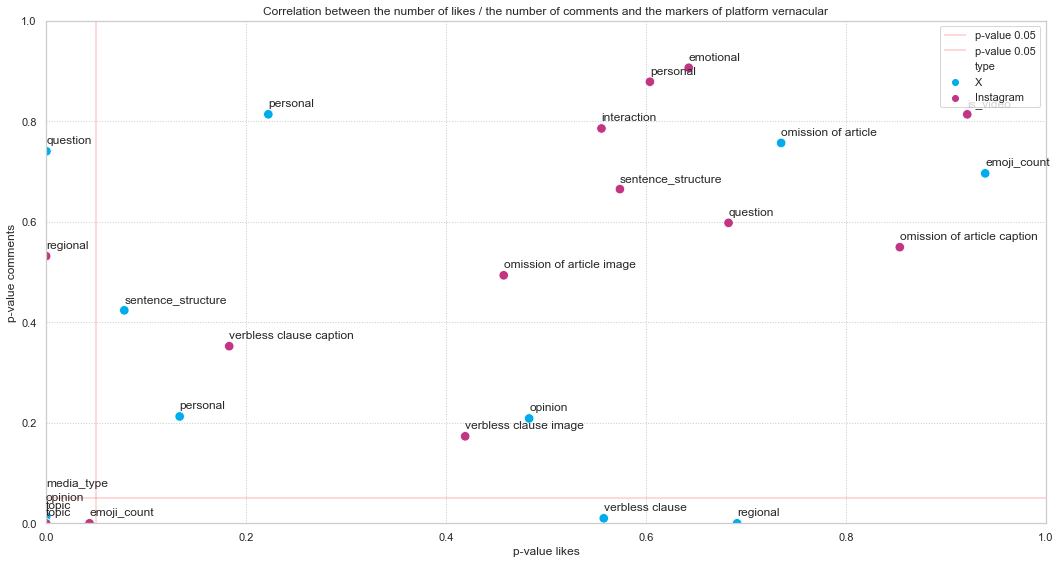

In [11]:
merged_stats = pd.concat([data_df, data_df_1])
merged_stats.loc[3, "column"]="personal"
merged_stats = merged_stats.reset_index(drop=True)

sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style("whitegrid", {"grid.linestyle": ":"})
colors = ["#00acee", "#C13584"]
sns.set_palette(sns.color_palette(colors))

ax = sns.scatterplot(data=merged_stats, x= "p-value likes", y="p-value comments", hue= "type", s=90)

for idx, row in merged_stats.iterrows():
    if idx == 2:
        ax.annotate(row['column'], (row['p-value likes'], row['p-value comments']+0.06))
    elif idx == 0:
        ax.annotate(row['column'], (row['p-value likes'], row['p-value comments']+0.03))
    elif idx == 12:
        ax.annotate(row['column'], (row['p-value likes'], row['p-value comments']+0.045))
    else:
        ax.annotate(row['column'], (row['p-value likes'], row['p-value comments']+0.015))

lines=[[[0.05, 0.05],[0,1], "p-value 0.05"],[[0,1],[0.05, 0.05], "p-value 0.05"]]
for i in lines:   
    line = mlines.Line2D(i[0], i[1], color='red', label=i[2], linewidth=0.3)
    transform = ax.transAxes
    line.set_transform(transform)
    ax.add_line(line)

ax.axes.set_xlim(0, 1)
ax.axes.set_ylim(0, 1)
plt.title("Correlation between the number of likes / the number of comments and the markers of platform vernacular")
plt.legend()
plt.tight_layout()
plt.savefig('C:/Users/Lui/Desktop/Leuphana/01_Bachelor Arbeit/Data/Images/results_scatterplot.png')
plt.show()

In [12]:
df = df_X
df["is_video"]=df["media_type"]=="video"

df1 = df_Insta
df1=df1.rename(columns={"verbless clause caption":"verbless clause", "omission of article caption":"omission of article"})

test_columns = ["emotional", "personal", "regional", "question", "verbless clause", "omission of article", "emoji_count", "is_video"]
results={}
count=0

for i in test_columns:
    count+=1
    df.dropna(subset=[i], inplace=True)  
    state = df[i].unique()[0]
    percent1 = round(len(df.loc[df[i]==state])/len(df)*100,0)
    percent2 = round(len(df1.loc[df1[i]==state])/len(df1)*100,0)   
    results[count]={"column": i, "state": state, "percent X": percent1, "percent Instagram": percent2} #"p-value": p_value}


results_df = pd.DataFrame.from_dict(results, orient="index")
results_df

,column,state,percent X,percent Instagram
1,emotional,no emotionalisation,96.0,87.0
2,personal,personalisation,39.0,65.0
3,regional,regional,87.0,82.0
4,question,False,90.0,68.0
5,verbless clause,all verbs included,92.0,87.0
6,omission of article,omission of article,20.0,17.0
7,emoji_count,0.0,100.0,61.0
8,is_video,False,100.0,63.0


## 2. Topics <a class="anchor" id="second-bullet"></a>

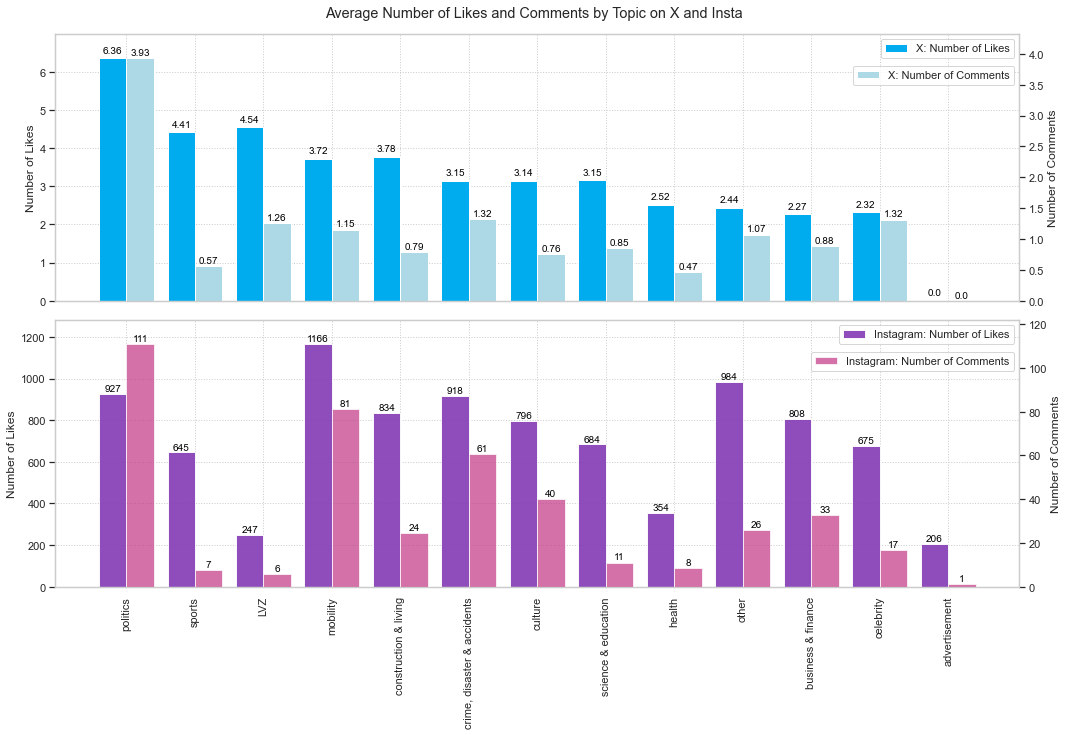

In [13]:
df_Insta.loc[df_Insta["topic"] == "Anzeige", "topic"] = "advertisement"


desired_order = ['politics', 'sports', 'LVZ', 'mobility', 'construction & living', 'crime, disaster & accidents', 'culture', 
                 'science & education', 'health', 'other', 'business & finance', 'celebrity', 'advertisement']


fig, (ax1, ax3) = plt.subplots(2, figsize=(15, 10), sharex=True)
fig.suptitle('Average Number of Likes and Comments by Topic on X and Insta', y=1.02)
ax2 = ax1.twinx()
ax4 = ax3.twinx()

width = 0.4

# Group by topic and calculate the mean for both columns (for X dataset)
likes_mean_X = df_X.groupby("topic")["no_of_likes"].mean().sort_values(ascending=False)
likes_mean_X = likes_mean_X.append(pd.Series([0], index=['advertisement']))
comments_mean_X = df_X.groupby("topic")["no_of_comments"].mean()
comments_mean_X = comments_mean_X.append(pd.Series([0], index=['advertisement']))


# Group by topic and calculate the mean for both columns (for X dataset)
likes_mean_X = df_X.groupby("topic")["no_of_likes"].mean().reindex(desired_order).fillna(0)
comments_mean_X = df_X.groupby("topic")["no_of_comments"].mean().reindex(desired_order).fillna(0)

# Group by topic and calculate the mean for both columns (for Insta dataset)
likes_mean_Insta = df_Insta.groupby("topic")["no_of_likes"].mean().reindex(desired_order).fillna(0)
comments_mean_Insta = df_Insta.groupby("topic")["no_of_comments"].mean().reindex(desired_order).fillna(0)

# Set positions for the bars
bar_positions1_X = range(len(desired_order))
bar_positions2_X = [pos + width for pos in bar_positions1_X]

bar_positions1_Insta = [pos for pos in bar_positions1_X]
bar_positions2_Insta = [pos + width for pos in bar_positions1_X]

# Plot the first bar chart (for X dataset)
ax1.bar(bar_positions1_X, likes_mean_X, width=width, color="#00acee", label='X: Number of Likes')
ax2.bar(bar_positions2_X, comments_mean_X, width=width, color='lightblue', label='X: Number of Comments')

# Plot the second bar chart (for Insta dataset)
ax3.bar(bar_positions1_Insta, likes_mean_Insta, width=width, color="#833AB4", alpha=0.9, label='Instagram: Number of Likes')
ax4.bar(bar_positions2_Insta, comments_mean_Insta, width=width, color="#C13584", alpha=0.7, label='Instagram: Number of Comments')

# Set x-axis ticks and labels
ax3.set_xticks([pos + width/2 for pos in bar_positions1_Insta])
ax3.set_xticklabels(desired_order, rotation=90, ha='center', va='top')

# Add space between the top of the bars and the top border of the graph
ax1.margins(y=0.1)
ax2.margins(y=0.1)
ax3.margins(y=0.1)
ax4.margins(y=0.1)

ax2.grid(False)
ax4.grid(False)

ax1.set_ylabel('Number of Likes')
ax2.set_ylabel('Number of Comments')
ax3.set_ylabel('Number of Likes')
ax4.set_ylabel('Number of Comments')

ax1.legend(loc='upper right')
ax2_legend = ax2.legend(loc='upper right')
ax2_legend.set_bbox_to_anchor((1.0, 0.9))
ax3.legend(loc='upper right')
ax4_legend = ax4.legend(loc='upper right')
ax4_legend.set_bbox_to_anchor((1.0, 0.9))

for p in ax1.patches:
    ax1.annotate(round(p.get_height(), 2), (p.get_x() + p.get_width() / 2, p.get_height() + 0.2),
                ha='center', va='center', fontsize=10, color='black')

for p in ax2.patches:
    ax2.annotate(round(p.get_height(), 2), (p.get_x() + p.get_width() / 2, p.get_height() + 0.09),
                 ha='center', va='center', fontsize=10, color='black')
    
for p in ax3.patches:
    ax3.annotate(int(round(p.get_height(), 0)), (p.get_x() + p.get_width() / 2, p.get_height() + 25),
                ha='center', va='center', fontsize=10, color='black')

for p in ax4.patches:
    ax4.annotate(int(round(p.get_height(), 0)), (p.get_x() + p.get_width() / 2, p.get_height() + 2.5),
                 ha='center', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.savefig('C:/Users/Lui/Desktop/Leuphana/01_Bachelor Arbeit/Data/Images/topic_comments_likes_Combined.png')

plt.show()

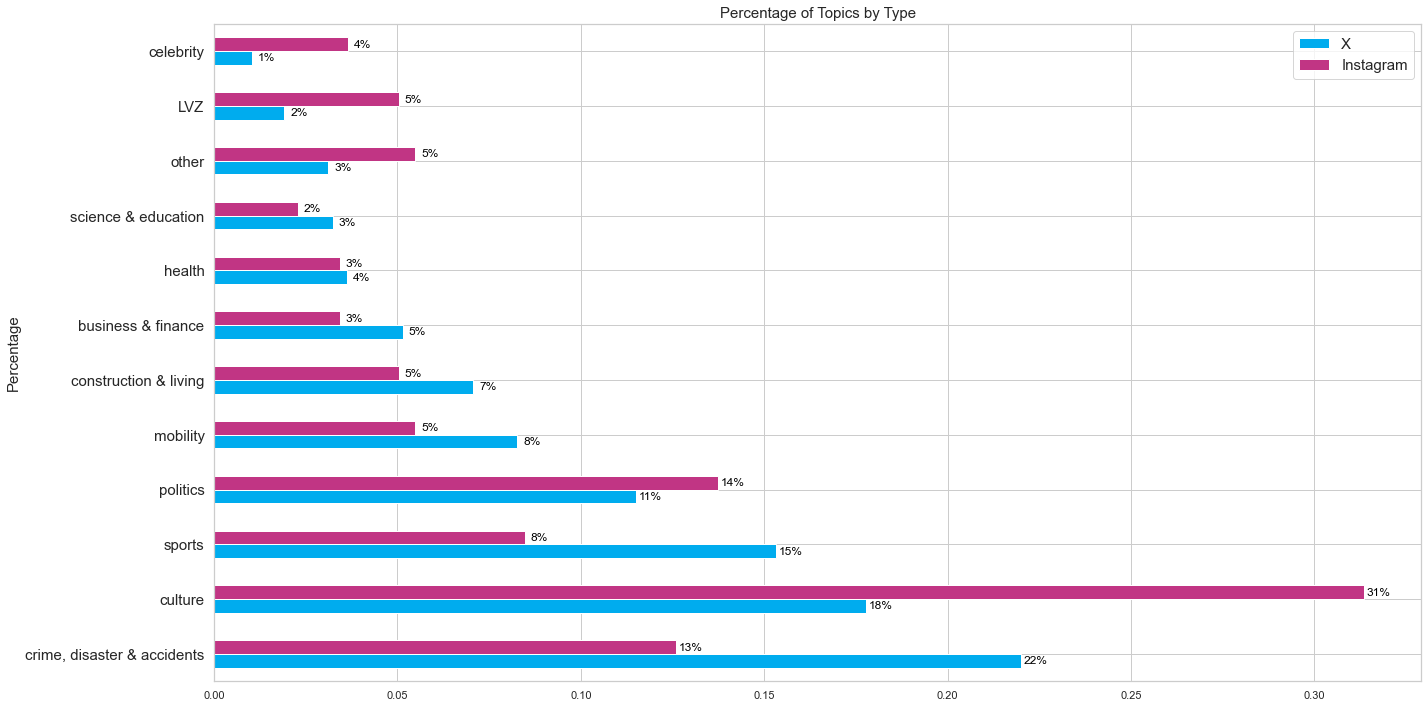

In [14]:
other_df = merged_df.copy()
other_df = other_df.loc[other_df['opinion'] != 'Advertisement']
other_df = other_df.loc[other_df["topic"]!= "Anzeige"]
total_counts = other_df['type'].value_counts()
percentage_df = pd.DataFrame()

for topic in other_df['topic'].unique():
    percentage_df[topic] = other_df[other_df['topic'] == topic]['type'].value_counts() / total_counts

percentage_df = percentage_df.transpose()
percentage_df = percentage_df.sort_values(by='X', ascending=False)

sns.set(rc={'figure.figsize': (20, 10)})
sns.set(style="whitegrid")

ax = percentage_df.plot(kind='barh', stacked=False, color=["#00acee", '#C13584'])
plt.title('Percentage of Topics by Type', fontsize=15)
plt.ylabel('Percentage', fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.tight_layout()

for p in ax.patches:
    ax.annotate(f'{int(round(p.get_width() * 100,0))}%', ((p.get_width() + 0.004), p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=12, color='black')

plt.savefig('C:/Users/Lui/Desktop/Leuphana/01_Bachelor Arbeit/Data/Images/01_percentage_of_topics_by_type_2.png')
plt.show()

## 3. Hashtags <a class="anchor" id="ninth-bullet"></a>

In [15]:
hashtags =[]
count=0
for i in df_X["hashtags"]:
    if type(i)==str:
        i = i.split(",")
        for j in i:
            hashtags.append(j)
                 
hashtag_counts = Counter(hashtags)
sorted_hashtags = sorted(hashtag_counts.items(), key=lambda x: x[1], reverse=True)

for hashtag, count in sorted_hashtags[:20]:
    print(f"{hashtag}: {count}")

#Leipzig: 658
#Sachsen: 103
#RBLeipzig: 98
#Leipzig": 49
"#Leipzig: 33
#Polizei: 31
#Leipziger: 29
#AfD: 24
#LVZ: 22
"#RBLeipzig: 20
#RB: 19
#Weihnachtsmarkt: 18
#Ofarim: 17
#GilOfarim: 14
#Israel: 14
#Dresden: 13
"#Sachsen: 11
#Döbeln: 10
#ChampionsLeague: 10
#DFB: 10


In [16]:
hashtags =[]
count=0
for i in df_Insta["caption"]:
    if type(i)==str:
        i = i.split(" ")        
        for j in i:
            if j != "":
                if j[0] =="#":
                    hashtags.append(j)

hashtag_counts = Counter(hashtags)
sorted_hashtags = sorted(hashtag_counts.items(), key=lambda x: x[1], reverse=True)

for hashtag, count in sorted_hashtags[:20]:
    print(f"{hashtag}: {count}")

#Sachsen: 240
#Leipzig: 217
#LVZ: 211
#LeipzigerVolkszeitung: 150
#leipzig: 30
#Polizei: 23
#Fußball: 22
#Dresden: 21
#Politik: 17
#RBLeipzig: 16
#Leipzig.: 15
#Kultur: 12
#Sport: 11
#Connewitz: 10
#UniLeipzig: 10
#AfD: 9
#Verkehr: 9
#sachsen: 8
#Wohnen: 8
#Musik: 8


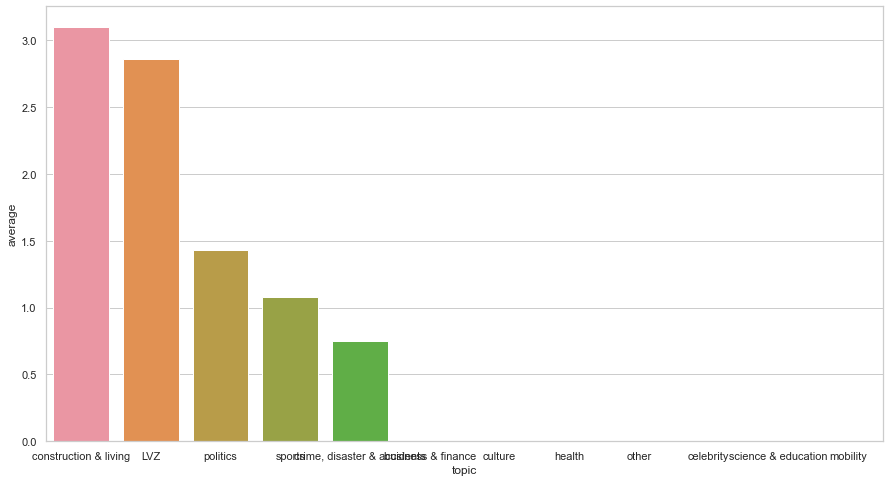

In [17]:
df = df_X
sns.set(rc={'figure.figsize':(15, 8)})
sns.set(style="whitegrid")
colors = ["#00acee"]
sns.set_palette(sns.color_palette(colors))

dct={}
count=0
for i in df["topic"].unique():
    count+=1
    x=df.loc[df["topic"]==i]
    p=x.loc[x["media_type"]=="photo"]
    dct[count]={"topic":i, "average": round(len(p)/len(x)*100,2)}

df1=pd.DataFrame.from_dict(dct, orient='index', columns=["topic","average"])
ax = sns.barplot(data=df1, x="topic", y="average", order=df1.sort_values('average', ascending = False).topic)    

In [18]:
hashtags = 0
for i in df_X.index:
    try:
        if df_X.loc[i, "text"]:
            text = df_X.loc[i, "text"]
            text = text.split(" ")
            for i in text:
                if len(i)>0:
                    if i[0]=="#":
                        hashtags += 1
    except KeyError:
        print(i)

print(hashtags)        
hashtags/len(df_X)

3312


1.8138006571741512

In [19]:
hashtags = 0
for i in df_Insta.index:
    try:
        if df_Insta.loc[i, "caption"]:
            text = df_Insta.loc[i, "caption"]
            text = text.split(" ")
            for i in text:
                if len(i)>0:
                    if i[0]=="#":
                        hashtags += 1
    except KeyError:
        print(i)

print(hashtags)        
hashtags/len(df_Insta)

2719


6.207762557077626

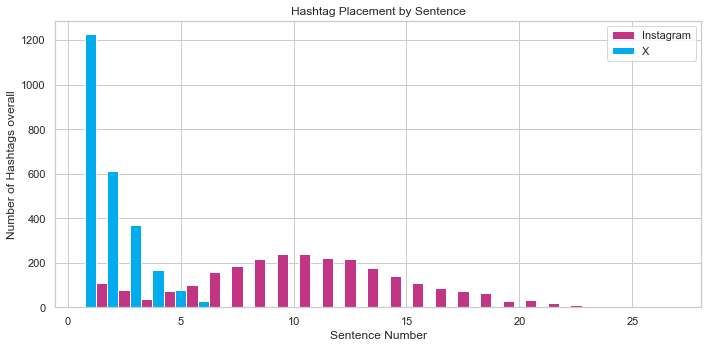

In [20]:
df=pd.read_csv("hashtags_X.csv")
df1=pd.read_csv("hashtags_Instagram.csv")

sns.set(rc={'figure.figsize': (10, 5)})
sns.set(style="whitegrid")

bar_width = 0.5
plt.bar(df1["0"]+bar_width, df1["1"], label="Instagram", color='#C13584', width=bar_width)
plt.bar(df["0"], df["1"], label="X", color="#00acee", width=bar_width)

plt.title('Hashtag Placement by Sentence')
plt.xlabel('Sentence Number')
plt.ylabel('Number of Hashtags overall')
plt.legend()
plt.tight_layout()

plt.savefig('C:/Users/Lui/Desktop/Leuphana/01_Bachelor Arbeit/Data/Images/hashtags.png')
plt.show()

## 4. Regional <a class="anchor" id="fourth-bullet"></a>

In [21]:
df = df_X
#df = df_Insta
mean_1 = df.loc[df["regional"]==df["regional"].unique()[0], "no_of_likes"].mean()
mean_2 = df.loc[df["regional"]==df["regional"].unique()[1], "no_of_likes"].mean()
mean_3 = df.loc[df["regional"]==df["regional"].unique()[0], "no_of_comments"].mean()
mean_4 = df.loc[df["regional"]==df["regional"].unique()[1], "no_of_comments"].mean()
print(df["regional"].unique()[0], df["regional"].unique()[1])
print(round(mean_1,2), round(mean_2,2))
print(round(mean_3,2), round(mean_4,2))

regional (inter)national
3.8 3.23
1.21 1.73


In [22]:
df = df_Insta
mean_1 = df.loc[df["regional"]==df["regional"].unique()[0], "no_of_likes"].mean()
mean_2 = df.loc[df["regional"]==df["regional"].unique()[1], "no_of_likes"].mean()
mean_3 = df.loc[df["regional"]==df["regional"].unique()[0], "no_of_comments"].mean()
mean_4 = df.loc[df["regional"]==df["regional"].unique()[1], "no_of_comments"].mean()
print(df["regional"].unique()[0], df["regional"].unique()[1])
print(round(mean_1,2), round(mean_2,2))
print(round(mean_3,2), round(mean_4,2))

regional (inter)national
861.75 514.38
49.56 28.3


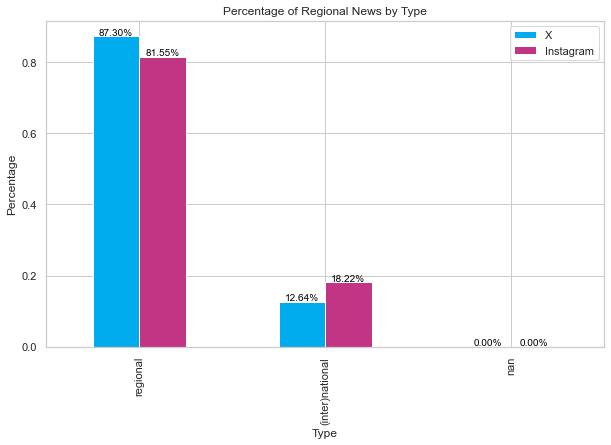

In [23]:
regional_df = merged_df.copy()
total_counts = regional_df['type'].value_counts()
percentage_df = pd.DataFrame()

for opinion in regional_df['regional'].unique():
    percentage_df[opinion] = regional_df[regional_df['regional'] == opinion]['type'].value_counts() / total_counts

percentage_df = percentage_df.transpose()
percentage_df = percentage_df.sort_values(by='Instagram', ascending=False)

sns.set(rc={'figure.figsize': (10, 6)})
sns.set(style="whitegrid")

ax = percentage_df.plot(kind='bar', stacked=False, color=["#00acee", '#C13584'])
plt.title('Percentage of Regional News by Type')
plt.xlabel('Type')
plt.ylabel('Percentage')

# Add annotations to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height() + 0.01),
                ha='center', va='center', fontsize=10, color='black')

#plt.savefig('C:/Users/Lui/Desktop/Leuphana/01_Bachelor Arbeit/Data/Images/04_percentage_of_regional_news_by_type.png')
plt.show()

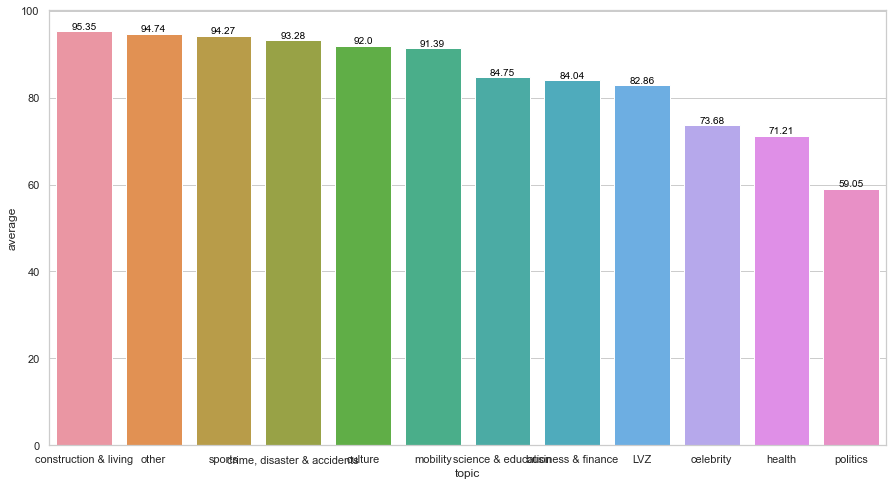

In [24]:
df = df_X

sns.set(rc={'figure.figsize':(15, 8)})
sns.set(style="whitegrid")

dct={}
count=0
for i in df["topic"].unique():
    count+=1
    x=df.loc[df["topic"]==i]
    p=x.loc[x["regional"]=="regional"]
    dct[count]={"topic":i, "average": round(len(p)/len(x)*100,2)}

df1=pd.DataFrame.from_dict(dct, orient='index', columns=["topic","average"])
ax = sns.barplot(data=df1, x="topic", y="average", order=df1.sort_values('average', ascending = False).topic)

for p in ax.patches:
    ax.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2, p.get_height()+1),
                ha='center', va='center', fontsize=10, color='black')
    

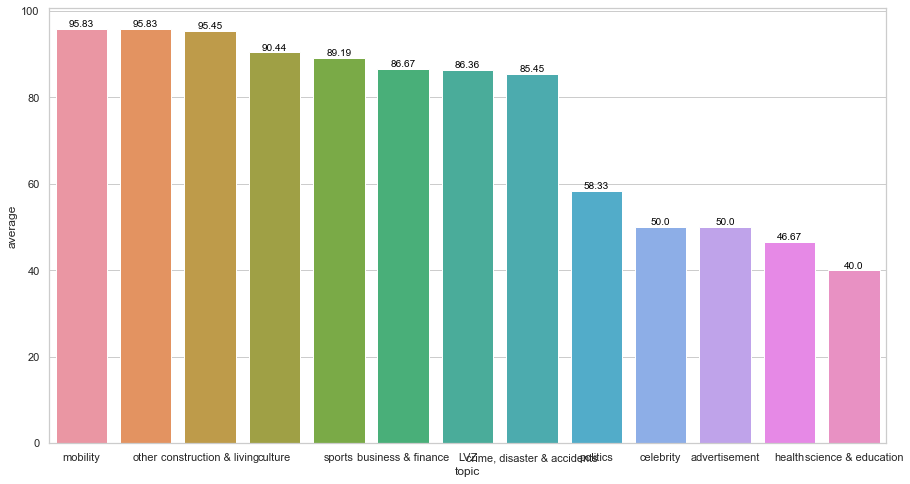

In [25]:
df = df_Insta 

sns.set(rc={'figure.figsize':(15, 8)})
sns.set(style="whitegrid")

dct={}
count=0
for i in df["topic"].unique():
    count+=1
    x=df.loc[df["topic"]==i]
    p=x.loc[x["regional"]=="regional"]
    dct[count]={"topic":i, "average": round(len(p)/len(x)*100,2)}

df1=pd.DataFrame.from_dict(dct, orient='index', columns=["topic","average"])
ax = sns.barplot(data=df1, x="topic", y="average", order=df1.sort_values('average', ascending = False).topic)

for p in ax.patches:
    ax.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2, p.get_height()+1),
                ha='center', va='center', fontsize=10, color='black')
    

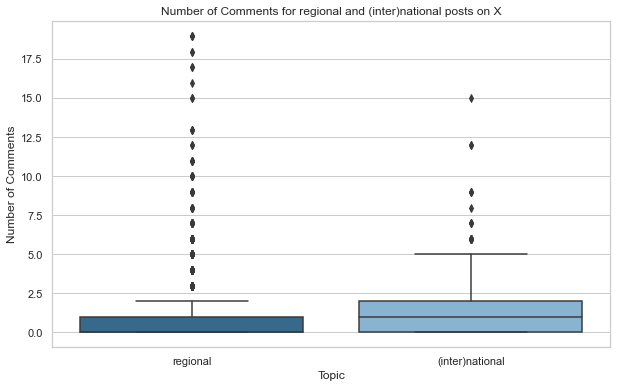

1.21 1.73


In [26]:
df = df_X

mean_emotional = df.loc[df["regional"]=="regional", "no_of_comments"].mean()
mean_not_emotional = df.loc[df["regional"]== "(inter)national", "no_of_comments"].mean()

df=df.loc[df["no_of_comments"]<20]

sns.set(rc={'figure.figsize':(10, 6)})
sns.set(style="whitegrid")

colors = ["#0c71b5", "#65bbf5"]
sns.set_palette(sns.color_palette(colors))

sns.boxplot(data= df, x="regional", y="no_of_comments", saturation=0.5) 

plt.title('Number of Comments for regional and (inter)national posts on X')
plt.xlabel('Topic')
plt.ylabel('Number of Comments')
 
plt.savefig('C:/Users/Lui/Desktop/Leuphana/01_Bachelor Arbeit/Data/Images/regional_comments_X.png')
plt.show()

print(round(mean_emotional,2), round(mean_not_emotional,2))

## 5. Videos <a class="anchor" id="tenth-bullet"></a>

In [27]:
df =df_Insta

print(df.groupby("is_video")["caption"].count())
print(df.groupby("is_video")[["no_of_likes", "no_of_comments"]].mean())

is_video
False    276
True     162
Name: caption, dtype: int64
          no_of_likes  no_of_comments
is_video                             
False      726.717391       39.326087
True       917.129630       56.203704


In [28]:
df =df_X

df['media_type'] = df['media_type'].fillna("text")

print(df.groupby("media_type")["text"].count())
print(df.groupby("media_type")[["no_of_likes", "no_of_comments", "bookmark_count", "retweet_count","view_count"]].mean())

media_type
photo      14
text     1808
video       4
Name: text, dtype: int64
            no_of_likes  no_of_comments  bookmark_count  retweet_count  \
media_type                                                               
photo         24.500000        4.714286        2.000000       4.000000   
text           3.547566        1.234513        0.083650       0.394170   
video         13.250000        8.250000        2.666667       3.666667   

             view_count  
media_type               
photo        6459.37500  
text         2129.25602  
video       11559.00000  


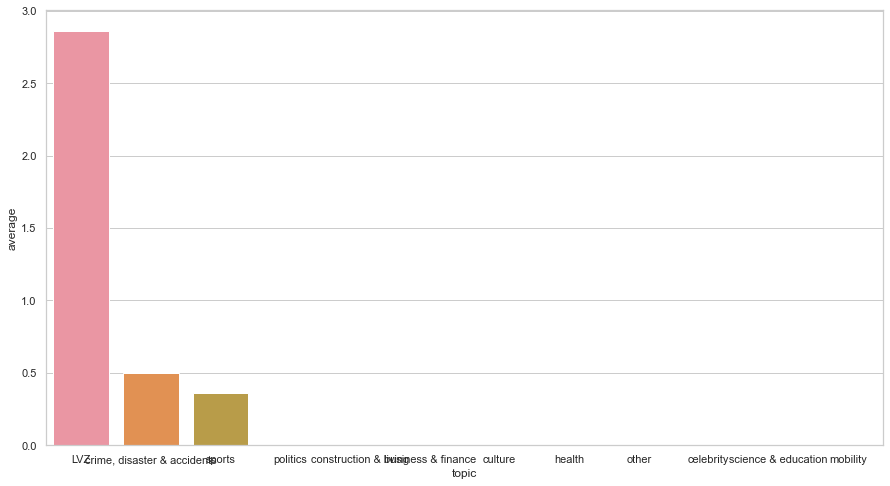

In [29]:
df = df_X
sns.set(rc={'figure.figsize':(15, 8)})
sns.set(style="whitegrid")
colors = ["#00acee"]
sns.set_palette(sns.color_palette(colors))

dct={}
count=0
for i in df["topic"].unique():
    count+=1
    x=df.loc[df["topic"]==i]
    p=x.loc[x["media_type"]=="video"]
    dct[count]={"topic":i, "average": round(len(p)/len(x)*100,2)}

df1=pd.DataFrame.from_dict(dct, orient='index', columns=["topic","average"])
ax = sns.barplot(data=df1, x="topic", y="average", order=df1.sort_values('average', ascending = False).topic)    

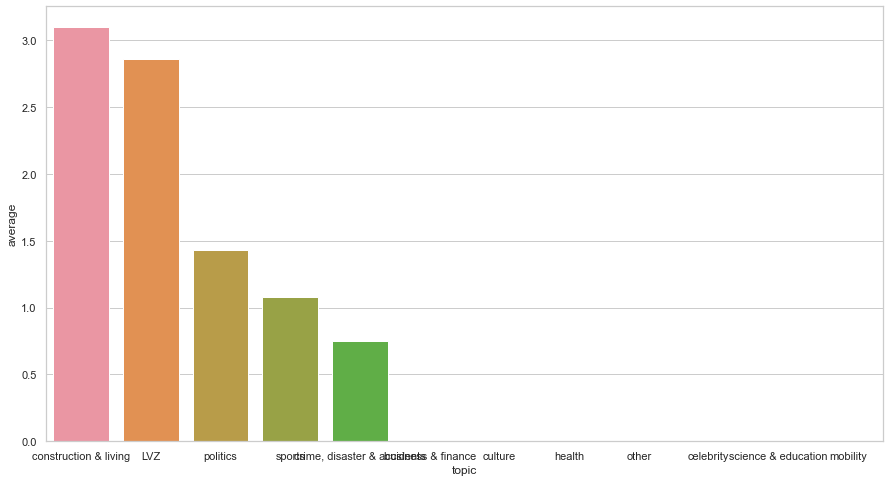

In [30]:
df = df_X
sns.set(rc={'figure.figsize':(15, 8)})
sns.set(style="whitegrid")
colors = ["#00acee"]
sns.set_palette(sns.color_palette(colors))

dct={}
count=0
for i in df["topic"].unique():
    count+=1
    x=df.loc[df["topic"]==i]
    p=x.loc[x["media_type"]=="photo"]
    dct[count]={"topic":i, "average": round(len(p)/len(x)*100,2)}

df1=pd.DataFrame.from_dict(dct, orient='index', columns=["topic","average"])
ax = sns.barplot(data=df1, x="topic", y="average", order=df1.sort_values('average', ascending = False).topic)    

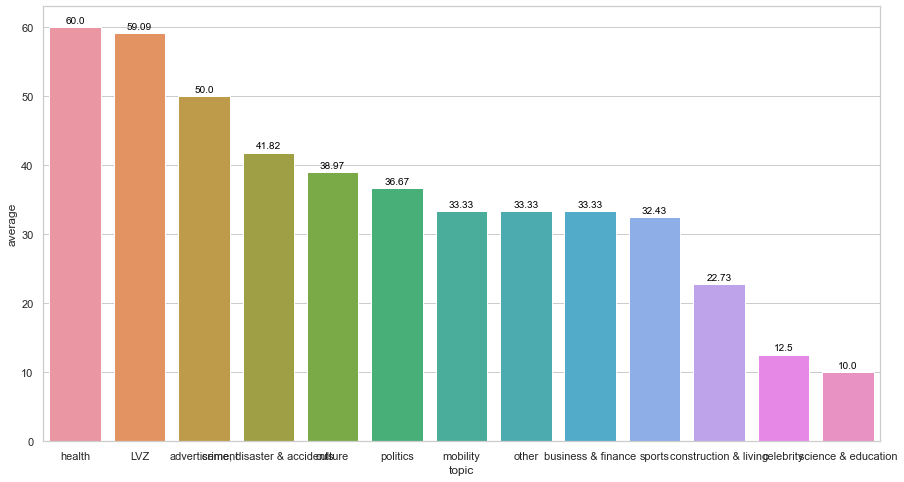

In [31]:
df =df_Insta 
sns.set(rc={'figure.figsize':(15, 8)})
sns.set(style="whitegrid")
colors = ["#00acee"]
sns.set_palette(sns.color_palette(colors))

dct={}
count=0
for i in df["topic"].unique():
    count+=1
    x=df.loc[df["topic"]==i]
    p=x.loc[x["is_video"]==True]
    dct[count]={"topic":i, "average": round(len(p)/len(x)*100,2)}

df1=pd.DataFrame.from_dict(dct, orient='index', columns=["topic","average"])
ax = sns.barplot(data=df1, x="topic", y="average", order=df1.sort_values('average', ascending = False).topic)

for p in ax.patches:
    ax.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2, p.get_height()+1),
                ha='center', va='center', fontsize=10, color='black')

357
142
80
19


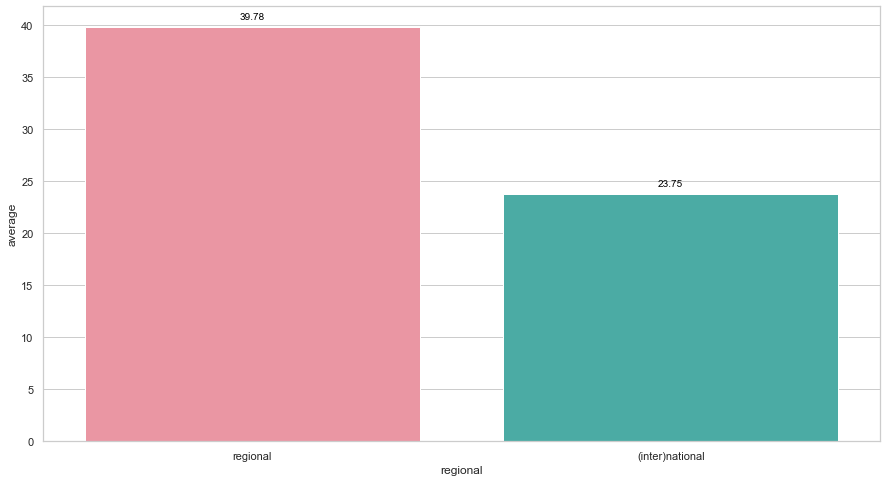

In [32]:
#df = df_X
df = df_Insta
sns.set(rc={'figure.figsize':(15, 8)})
sns.set(style="whitegrid")
colors = ["#00acee"]
sns.set_palette(sns.color_palette(colors))

df.dropna(subset=["regional"], inplace=True)

dct={}
count=0
for i in df["regional"].unique():
    count+=1
    x=df.loc[df["regional"]==i]
    p=x.loc[x["is_video"]==True]
    print(len(x))
    print(len(p))
    dct[count]={"regional":i, "average": round(len(p)/len(x)*100,2)}

df1=pd.DataFrame.from_dict(dct, orient='index', columns=["regional","average"])
ax = sns.barplot(data=df1, x="regional", y="average", order=df1.sort_values('average', ascending = False).regional)

for p in ax.patches:
    ax.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2, p.get_height()+1),
                ha='center', va='center', fontsize=10, color='black')
    

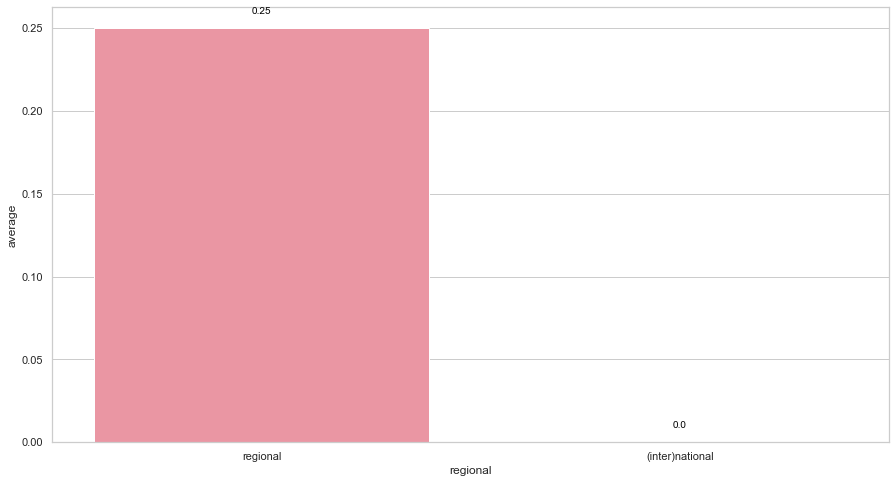

In [33]:
df = df_X
sns.set(rc={'figure.figsize':(15, 8)})
sns.set(style="whitegrid")
colors = ["#00acee"]
sns.set_palette(sns.color_palette(colors))

df.dropna(subset=["regional"], inplace=True)

dct={}
count=0
for i in df["regional"].unique():
    count+=1
    x=df.loc[df["regional"]==i]
    p=x.loc[x["media_type"]=="video"]
    dct[count]={"regional":i, "average": round(len(p)/len(x)*100,2)}

df1=pd.DataFrame.from_dict(dct, orient='index', columns=["regional","average"])
ax = sns.barplot(data=df1, x="regional", y="average", order=df1.sort_values('average', ascending = False).regional)

for p in ax.patches:
    ax.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2, p.get_height()+0.01),
                ha='center', va='center', fontsize=10, color='black')
    

## 6. Similarity to Headlines <a class="anchor" id="eleventh-bullet"></a>

In [34]:
df=df_Insta
print(len(df.loc[df["omission of article caption"] == "omission of article"]))
print(len(df.loc[df["omission of article caption"] == "all articles included"]))
print(len(df.loc[df["omission of article image"] == "omission of article"]))
print(len(df.loc[df["omission of article image"] == "all articles included"]))

73
356
116
300


In [35]:
df=df_Insta
print(len(df.loc[df["verbless clause caption"] == "verbless clause"]))
print(len(df.loc[df["verbless clause caption"] == "all verbs included"]))
print(len(df.loc[df["verbless clause image"] == "verbless clause"]))
print(len(df.loc[df["verbless clause image"] == "all verbs included"]))

55
382
307
120


In [36]:
df2=df_X
print(len(df2.loc[df2["omission of article"] == "omission of article"]))
print(len(df2.loc[df2["omission of article"] == "all articles included"]))

357
1451


In [37]:
df2=df_X
print(len(df2.loc[df2["verbless clause"] == "verbless clause"]))
print(len(df2.loc[df2["verbless clause"] == "all verbs included"]))

155
1671


In [38]:
print(len(df.loc[df["verbless clause caption"] == "verbless clause"])/len(df))
print(len(df.loc[df["verbless clause caption"] == "all verbs included"])/len(df))
print(len(df.loc[df["verbless clause image"] == "verbless clause"])/len(df))
print(len(df.loc[df["verbless clause image"] == "all verbs included"])/len(df))
print(len(df2.loc[df2["verbless clause"] == "verbless clause"])/len(df2))
print(len(df2.loc[df2["verbless clause"] == "all verbs included"])/len(df2))

0.12585812356979406
0.8741418764302059
0.7025171624713958
0.2745995423340961
0.08488499452354874
0.9151150054764513


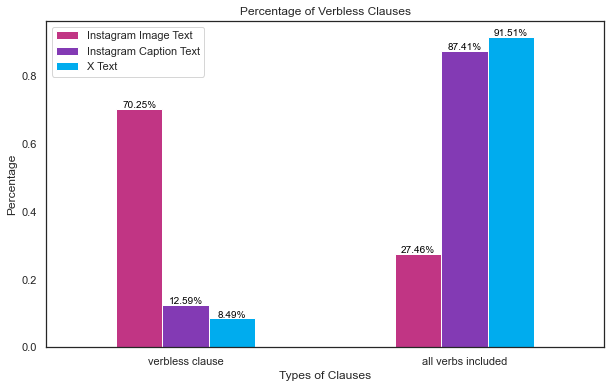

In [39]:
df1_values = {
    'verbless clause': len(df.loc[df["verbless clause caption"] == "verbless clause"]) / len(df),
    'all verbs included': len(df.loc[df["verbless clause caption"] == "all verbs included"]) / len(df)
}
df_values ={
    'verbless clause': len(df.loc[df["verbless clause image"] == "verbless clause"]) / len(df),
    'all verbs included': len(df.loc[df["verbless clause image"] == "all verbs included"]) / len(df),
}

df2_values = {
    'verbless clause': len(df2.loc[df2["verbless clause"] == "verbless clause"]) / len(df2),
    'all verbs included': len(df2.loc[df2["verbless clause"] == "all verbs included"]) / len(df2),
}

# Create dataframes
df_values_df = pd.DataFrame(df_values.values(), index=df_values.keys(), columns=['Instagram Image Text'])
df1_values_df = pd.DataFrame(df1_values.values(), index=df_values.keys(), columns=['Instagram Caption Text'])
df2_values_df = pd.DataFrame(df2_values.values(), index=df2_values.keys(), columns=['X Text'])

# Concatenate dataframes
plot_df = pd.concat([df_values_df, df1_values_df, df2_values_df], axis=1)

# Plot the bar chart with different colors for each column
sns.set(rc={'figure.figsize':(10, 6)})
sns.set(style="white")
ax = plot_df.plot(kind='bar', color=['#C13584', "#833AB4", "#00acee"])

# Customize the plot
plt.title('Percentage of Verbless Clauses')
plt.xlabel('Types of Clauses')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height() + 0.01),
                ha='center', va='center', fontsize=10, color='black')

plt.savefig('C:/Users/Lui/Desktop/Leuphana/01_Bachelor Arbeit/Data/Images/07_percentage_of_verbless_claues.png')
plt.show()

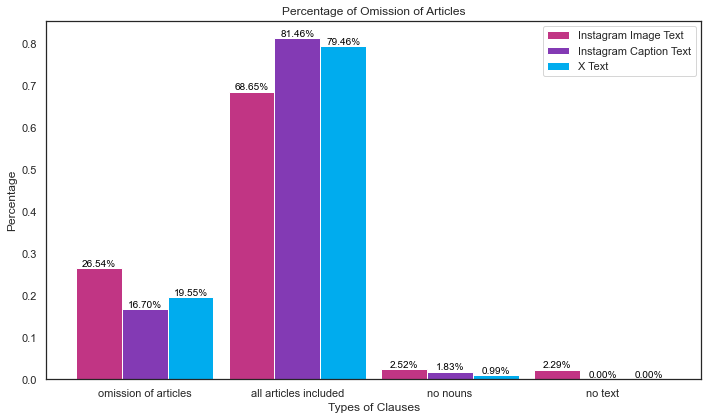

In [40]:
df1_values = {
    'omission of articles': len(df.loc[df["omission of article caption"] == "omission of article"]) / len(df),
    'all articles included': len(df.loc[df["omission of article caption"] == "all articles included"]) / len(df),
    'no nouns': len(df.loc[df["omission of article caption"] == "no nouns"]) / len(df),
    'no text': len(df.loc[df["omission of article caption"] == "no text"]) / len(df)
}
df_values = {
    'omission of articles': len(df.loc[df["omission of article image"] == "omission of article"]) / len(df),
    'all articles included': len(df.loc[df["omission of article image"] == "all articles included"]) / len(df),
    'no nouns': len(df.loc[df["omission of article image"] == "no nouns"]) / len(df),
    'no text': len(df.loc[df["omission of article image"] == "no text"]) / len(df)
}

df2_values = {
    'omission of articles': len(df2.loc[df2["omission of article"] == "omission of article"]) / len(df2),
    'all articles included': len(df2.loc[df2["omission of article"] == "all articles included"]) / len(df2),
    'no nouns': len(df2.loc[df2["omission of article"] == "no nouns"]) / len(df2),
    'no text': len(df2.loc[df2["omission of article"] == "no text"]) / len(df2)
}


# Create dataframes
df_values_df = pd.DataFrame(df_values.values(), index=df_values.keys(), columns=['Instagram Image Text'])
df1_values_df = pd.DataFrame(df1_values.values(), index=df1_values.keys(), columns=['Instagram Caption Text'])
df2_values_df = pd.DataFrame(df2_values.values(), index=df2_values.keys(), columns=['X Text'])

# Concatenate dataframes
plot_df = pd.concat([df_values_df, df1_values_df, df2_values_df], axis=1)

# Plot the bar chart with different colors for each column
sns.set(rc={'figure.figsize': (10, 6)})
sns.set(style="white")
ax = plt.gca()

# Define bar width
bar_width = 0.3
color=['#C13584', "#833AB4", "#00acee"]

# Plotting
for i, column in enumerate(plot_df.columns):
    x = range(len(plot_df))
    ax.bar([pos + i * bar_width for pos in x], plot_df[column], width=bar_width, label=column, color=color[i])

# Customize the plot
plt.title('Percentage of Omission of Articles')
plt.xlabel('Types of Clauses')
plt.ylabel('Percentage')
plt.xticks([pos + bar_width for pos in x], plot_df.index)
plt.legend()
plt.tight_layout()

for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height() + 0.01),
                ha='center', va='center', fontsize=10, color='black')

plt.savefig('C:/Users/Lui/Desktop/Leuphana/01_Bachelor Arbeit/Data/Images/07_percentage_of_omission_of_articles.png')
plt.show()

In [41]:
#average word length in characters
word_lengths = 0
words=0
for i in df2["text"]:
    if pd.isna(i)==False:
        i = i.split(" ")
        for j in i:
            word_lengths += len(j)
            words += 1

average_word_length_text = word_lengths/ words
print(round(average_word_length_text, 2))

6.69


In [42]:
#average word length in characters
word_lengths = 0
words=0
for i in df["caption"]:
    if pd.isna(i)==False:
        i = i.split(" ")
        for j in i:
            word_lengths += len(j)
            words += 1

average_word_length_text = word_lengths/ words
print(round(average_word_length_text, 2))

6.23


In [43]:
#average word length in characters
word_lengths = 0
words=0
for i in df["Image Text"]:
    if pd.isna(i)==False:
        i = i.split(" ")
        for j in i:
            word_lengths += len(j)
            words += 1

average_word_length_text = word_lengths/ words
print(round(average_word_length_text, 2))

8.17


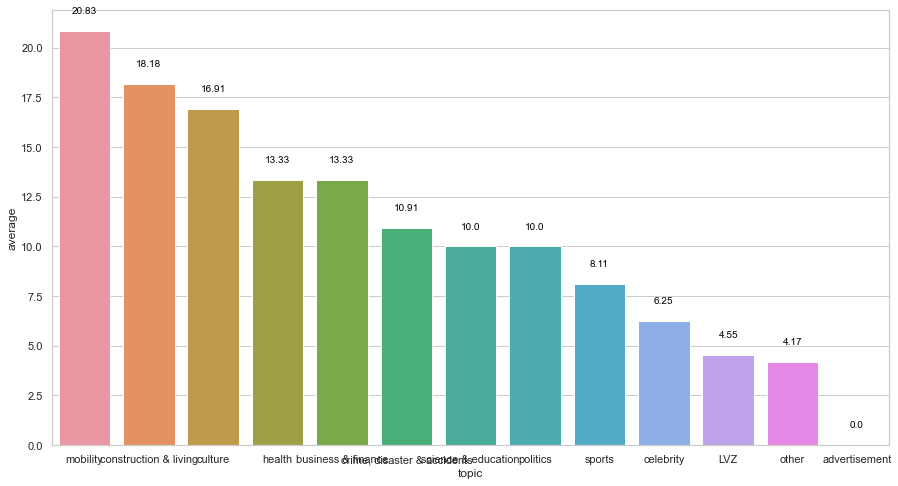

In [44]:
df =df_Insta 
sns.set(rc={'figure.figsize':(15, 8)})
sns.set(style="whitegrid")
colors = ["#00acee"]
sns.set_palette(sns.color_palette(colors))

dct={}
count=0
for i in df["topic"].unique():
    count+=1
    x=df.loc[df["topic"]==i]
    p=x.loc[x["verbless clause caption"]=="verbless clause"]
    dct[count]={"topic":i, "average": round(len(p)/len(x)*100,2)}

df1=pd.DataFrame.from_dict(dct, orient='index', columns=["topic","average"])
ax = sns.barplot(data=df1, x="topic", y="average", order=df1.sort_values('average', ascending = False).topic)

for p in ax.patches:
    ax.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2, p.get_height()+1),
                ha='center', va='center', fontsize=10, color='black')

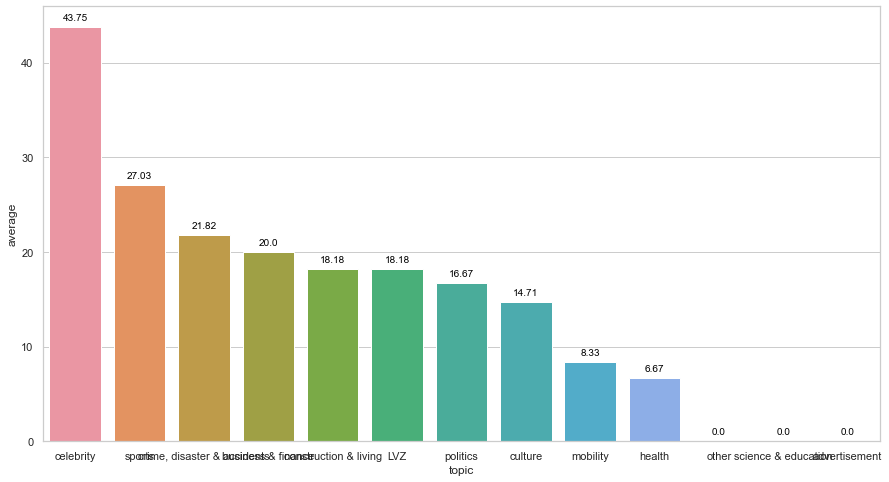

In [45]:
df =df_Insta 
sns.set(rc={'figure.figsize':(15, 8)})
sns.set(style="whitegrid")
colors = ["#00acee"]
sns.set_palette(sns.color_palette(colors))

dct={}
count=0
for i in df["topic"].unique():
    count+=1
    x=df.loc[df["topic"]==i]
    p=x.loc[x["omission of article caption"]=="omission of article"]
    dct[count]={"topic":i, "average": round(len(p)/len(x)*100,2)}

df1=pd.DataFrame.from_dict(dct, orient='index', columns=["topic","average"])
ax = sns.barplot(data=df1, x="topic", y="average", order=df1.sort_values('average', ascending = False).topic)

for p in ax.patches:
    ax.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2, p.get_height()+1),
                ha='center', va='center', fontsize=10, color='black')

In [46]:
df2=df_X
x=df2.loc[df2["verbless clause"] == "verbless clause"]
print(x["no_of_comments"].mean())
y=df2.loc[df2["verbless clause"] == "all verbs included"]
print(y["no_of_comments"].mean())

0.8129032258064516
1.319569120287253


In [47]:
df2=df_X
print(len(df2.loc[df2["verbless clause"] == "verbless clause"]))
print(len(df2.loc[df2["verbless clause"] == "all verbs included"]))

155
1671


## 7. Sentence Structure <a class="anchor" id="twelfth-bullet"></a>

In [48]:
df_X.dropna(subset=["ratio_main_sub"], inplace=True) 
df_Insta.dropna(subset=["ratio_main_sub"], inplace=True)

print("ratio_main_sub:", "Insta:", df_Insta["ratio_main_sub"].mean(), "X:", df_X["ratio_main_sub"].mean())
print("ratio_main:", "Insta:", df_Insta["ratio_main"].mean(), "X: ", df_X["ratio_main"].mean())
print("ratio_sub:", "Insta:", df_Insta["ratio_sub"].mean(), "X: ", df_X["ratio_sub"].mean())
print("mainclauses:", "Insta:", df_Insta["main_clauses"].mean(), "X:", df_X["main_clauses"].mean())
print("subclauses:", "Insta:", df_Insta["sub_clauses"].mean(), "X:" , df_X["sub_clauses"].mean())
print("number of sentences:", "Insta:", df_Insta["no_of_sentences"].mean(), "X:" , df_X["no_of_sentences"].mean())

ratio_main_sub: Insta: 0.164488220158175 X: 0.17204092920353986
ratio_main: Insta: 1.008879343350868 X:  0.9771860514117159
ratio_sub: Insta: 0.16298862510198833 X:  0.1453263274336285
mainclauses: Insta: 6.67906976744186 X: 2.457411504424779
subclauses: Insta: 1.0790697674418606 X: 0.3401548672566372
number of sentences: Insta: 6.851162790697674 X: 2.6548672566371683


In [49]:
print(round(len(df_X.loc[df_X["sentence_structure"]=="complex"])/len(df_X)*100, 2))
print(round(len(df_X.loc[df_X["sentence_structure"]=="simple"])/len(df_X)*100, 2))

28.87
71.13


In [50]:
print(round(len(df_Insta.loc[df_Insta["sentence_structure"]=="complex"])/len(df_Insta)*100, 2))
print(round(len(df_Insta.loc[df_Insta["sentence_structure"]=="simple"])/len(df_Insta)*100, 2))

44.19
55.81


## 8. Question Marks and Interaction <a class="anchor" id="seventh-bullet"></a>

In [51]:
df = df_Insta
df["question"]=df["question"].replace(0, False)
df["question"]=df["question"].replace([1,2,3,4], True)

mean_question = df.loc[df["question"]==True, "no_of_comments"].mean()
mean_no_question = df.loc[df["question"]== False, "no_of_comments"].mean()
print(mean_question, mean_no_question) 

48.87591240875913 42.64505119453925


In [52]:
df = df_Insta
df["question"]=df["question"].replace(0, False)
df["question"]=df["question"].replace([1,2,3,4], True)
df["interaction"]=df["interaction"].replace("yes", "interaction")
df["interaction"]=df["interaction"].replace("no", "no interaction")

df_questions = df.loc[df["question"]==True]
len(df_questions.loc[df["interaction"]=="interaction"])/ len(df_questions) *100

43.79562043795621

In [53]:
df=df_Insta
df["interaction"]=df["interaction"].replace("yes", "interaction")
df["interaction"]=df["interaction"].replace("no", "no interaction")
len(df.loc[df["interaction"]=="interaction"])/ len(df) *100

14.186046511627906

In [54]:
len(df.loc[df["question"]>=1])/ len(df) *100

31.86046511627907

In [55]:
df_X.loc[df_X["question"]==False, "no_of_likes"].sort_values(ascending=False)[0:20]

828     136.0
360     114.0
924      93.0
787      91.0
132      80.0
1465     76.0
652      66.0
607      60.0
357      45.0
716      39.0
38       39.0
1494     37.0
650      37.0
1801     36.0
890      34.0
1495     34.0
119      33.0
3        30.0
819      28.0
262      25.0
Name: no_of_likes, dtype: float64

In [56]:
df_X.loc[df_X["question"]==True, "no_of_likes"].sort_values(ascending=False)[0:20]

261     245.0
1120     35.0
886      12.0
1769     12.0
1236     11.0
198      10.0
1042      9.0
1243      9.0
1783      8.0
473       7.0
1283      7.0
229       7.0
396       7.0
1719      6.0
502       6.0
1258      5.0
1406      5.0
1771      5.0
1359      5.0
1037      5.0
Name: no_of_likes, dtype: float64

In [57]:
df = df_X
mean_question = df.loc[df["question"]==True, "no_of_comments"].mean()
mean_no_question = df.loc[df["question"]== False, "no_of_comments"].mean()
mean_question1 = df.loc[df["question"]==True, "no_of_likes"].mean()
mean_no_question1 = df.loc[df["question"]== False, "no_of_likes"].mean()
print("likes:", "with questions:", mean_question1, "without questions:", mean_no_question1) 
print("comments:", "with questions:", mean_question, "without questions:", mean_no_question)  

likes: with questions: 3.6881720430107525 without questions: 3.7453760789149197
comments: with questions: 1.6451612903225807 without questions: 1.2416769420468556


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

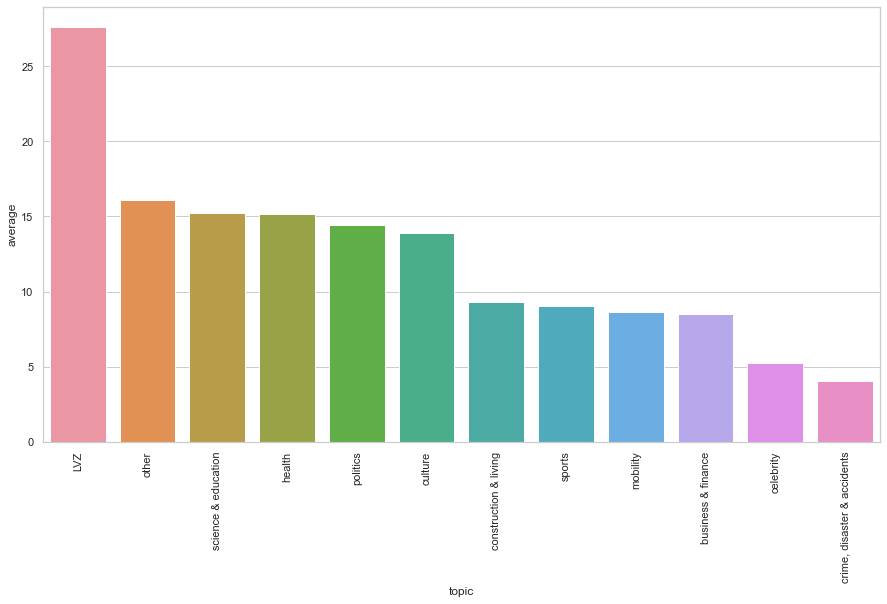

In [58]:
df = df_X

sns.set(rc={'figure.figsize':(15, 8)})
sns.set(style="whitegrid")

dct={}
count=0
for i in df["topic"].unique():
    count+=1
    x=df.loc[df["topic"]==i]
    p=x.loc[x["question"]==True]
    dct[count]={"topic":i, "average": round(len(p)/len(x)*100,2)}

df1=pd.DataFrame.from_dict(dct, orient='index', columns=["topic","average"])
ax = sns.barplot(data=df1, x="topic", y="average", order=df1.sort_values('average', ascending = False).topic)   
plt.xticks(rotation=90)

In [59]:
print(round(len(df_X.loc[df_X["question"]==True])/len(df_X)*100))
print(round(len(df_Insta.loc[df_Insta["question"]==True])/len(df_Insta)*100))

10
32


## 9. Emojis <a class="anchor" id="eigth-bullet"></a>

In [60]:
print(round((len(df_Insta.loc[df_Insta["emoji_count"]==1])/len(df_Insta))*100))
print(round((len(df_X.loc[df_X["emoji_count"]==1])/len(df_X))*100,2))

39
0.22


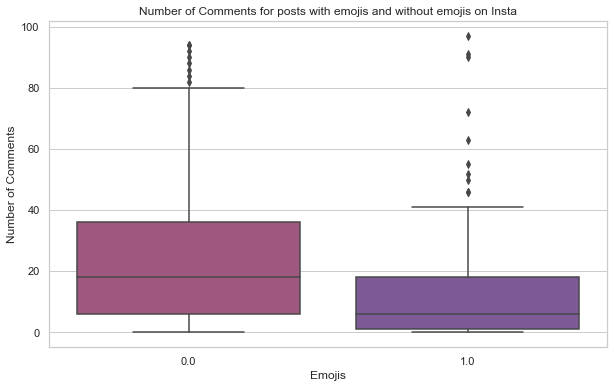

32.34 52.59


In [61]:
df = df_Insta

mean_emotional = df.loc[df["emoji_count"]== 1, "no_of_comments"].mean()
mean_not_emotional = df.loc[df["emoji_count"]== 0, "no_of_comments"].mean()


df=df.loc[df["no_of_comments"]<100]

colors = ["#C13584", "#833AB4"]
sns.set_palette(sns.color_palette(colors))

sns.set(rc={'figure.figsize':(10, 6)})
sns.set(style="whitegrid")
sns.set_palette(sns.color_palette(colors))

sns.boxplot(data= df, x="emoji_count", y="no_of_comments", saturation=0.5) 

plt.title('Number of Comments for posts with emojis and without emojis on Insta')
plt.xlabel('Emojis')
plt.ylabel('Number of Comments')
 
plt.savefig('C:/Users/Lui/Desktop/Leuphana/01_Bachelor Arbeit/Data/Images/personal_comments_Insta.png')
plt.show()

print(round(mean_emotional,2), round(mean_not_emotional,2))

In [62]:
df=df_Insta        
print(len(df.loc[df["emoji_count"]==1]))

169


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

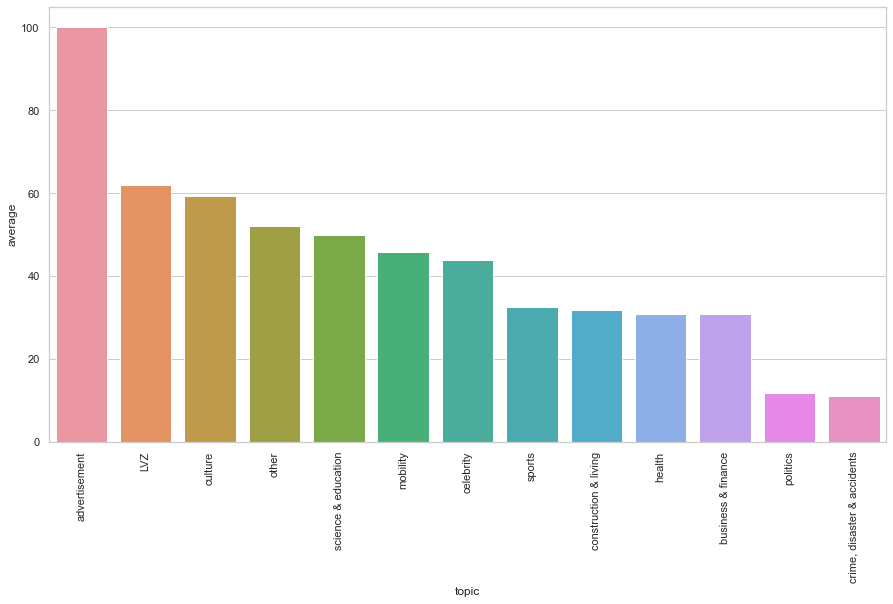

In [63]:
df = df_Insta 

sns.set(rc={'figure.figsize':(15, 8)})
sns.set(style="whitegrid")

dct={}
count=0
for i in df["topic"].unique():
    count+=1
    x=df.loc[df["topic"]==i]
    p=x.loc[x["emoji_count"]==1]
    dct[count]={"topic":i, "average": round(len(p)/len(x)*100,2)}

df1=pd.DataFrame.from_dict(dct, orient='index', columns=["topic","average"])
ax = sns.barplot(data=df1, x="topic", y="average", order=df1.sort_values('average', ascending = False).topic)   
plt.xticks(rotation=90)

In [64]:
#Emojis
df=df_Insta

orig_list=[]

def find_emojis(text):
    orig_list.append(text)

df["caption"].apply(find_emojis)
emoji_dict = adv.extract_emoji(orig_list) 

print(emoji_dict["emoji_freq"])
print(emoji_dict["top_emoji"][:10])
print(emoji_dict['top_emoji_text'][:10])
print(emoji_dict['top_emoji_groups'][:5])#, emoji_dict['top_emoji_sub_groups'])
print(emoji_dict['overview'])

[(0, 261), (1, 86), (2, 41), (3, 18), (4, 10), (5, 7), (6, 1), (7, 3), (10, 1), (12, 1), (17, 1)]
[('👉', 28), ('✨', 19), ('🎄', 16), ('🎉', 10), ('📅', 8), ('⚽', 7), ('🌟', 7), ('💬', 6), ('💰', 4), ('❤️', 4)]
[('backhand index pointing right', 28), ('sparkles', 19), ('Christmas tree', 16), ('party popper', 10), ('calendar', 8), ('soccer ball', 7), ('glowing star', 7), ('speech balloon', 6), ('red heart', 5), ('houses', 4)]
[('Activities', 75), ('People & Body', 67), ('Travel & Places', 62), ('Objects', 60), ('Smileys & Emotion', 51)]
{'num_posts': 430, 'num_emoji': 363, 'emoji_per_post': 0.8441860465116279, 'unique_emoji': 172}


In [65]:
#Emojis
df=df_X
orig_list=[]

def find_emojis(text):
    orig_list.append(text)

df["text"].apply(find_emojis)

emoji_dict = adv.extract_emoji(orig_list)    
#dict_keys(['emoji', 'emoji_text', 'emoji_flat', 'emoji_flat_text', 'emoji_counts', 'emoji_freq', 'top_emoji', 'top_emoji_text', 'top_emoji_groups', 'top_emoji_sub_groups', 'overview'])
print(emoji_dict["emoji_freq"])
print(emoji_dict["top_emoji"][:10])
print(emoji_dict['top_emoji_text'])
print(emoji_dict['top_emoji_groups'][:5])#, emoji_dict['top_emoji_sub_groups'])
print(emoji_dict['overview'])

[(0, 1804), (1, 4)]
[('✈️', 1), ('🛍️', 1), ('📨', 1), ('🎆', 1)]
[('airplane', 1), ('shopping bags', 1), ('incoming envelope', 1), ('fireworks', 1)]
[('Objects', 2), ('Travel & Places', 1), ('Activities', 1)]
{'num_posts': 1808, 'num_emoji': 4, 'emoji_per_post': 0.0022123893805309734, 'unique_emoji': 4}


## 10. Personal <a class="anchor" id="third-bullet"></a>

In [66]:
df = df_X
mean_1 = df.loc[df["personal"]==df["personal"].unique()[0], "no_of_likes"].mean()
mean_2 = df.loc[df["personal"]==df["personal"].unique()[1], "no_of_likes"].mean()
mean_3 = df.loc[df["personal"]==df["personal"].unique()[0], "no_of_comments"].mean()
mean_4 = df.loc[df["personal"]==df["personal"].unique()[1], "no_of_comments"].mean()
print(df["personal"].unique()[0], df["personal"].unique()[1])
print(round(mean_1,2), round(mean_2,2))
print(round(mean_3,2), round(mean_4,2))

personalisation no personalisation
4.66 3.14
1.71 1.01


In [67]:
df = df_Insta
mean_1 = df.loc[df["personal"]==df["personal"].unique()[0], "no_of_likes"].mean()
mean_2 = df.loc[df["personal"]==df["personal"].unique()[1], "no_of_likes"].mean()
mean_3 = df.loc[df["personal"]==df["personal"].unique()[0], "no_of_comments"].mean()
mean_4 = df.loc[df["personal"]==df["personal"].unique()[1], "no_of_comments"].mean()
print(df["personal"].unique()[0], df["personal"].unique()[1])
print(round(mean_1,2), round(mean_2,2))
print(round(mean_3,2), round(mean_4,2))

no personalisation personalisation
859.03 767.49
53.04 40.08


In [68]:
df = df_X
percent = round(len(df.loc[df["personal"]=="personalisation"])/len(df)*100,0)
percent

39.0

In [69]:
df = df_Insta
percent = round(len(df.loc[df["personal"]=="personalisation"])/len(df)*100,0)
percent

65.0

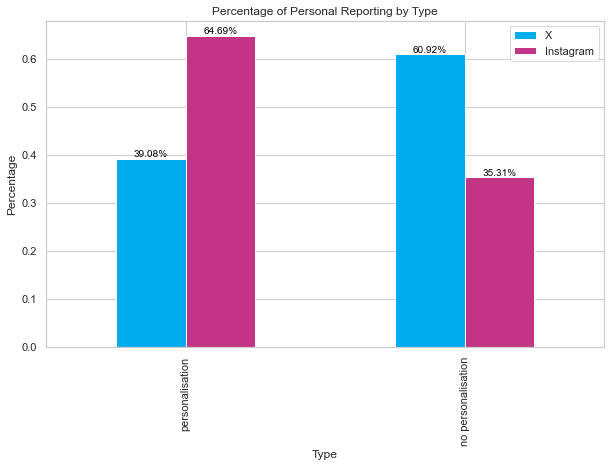

In [70]:
personal_df=merged_df.copy()

total_counts = personal_df['type'].value_counts()
percentage_df = pd.DataFrame()

for i in personal_df['personal'].unique():
    percentage_df[i] = personal_df[personal_df['personal'] == i]['type'].value_counts() / total_counts
percentage_df = percentage_df.transpose()
percentage_df = percentage_df.sort_values(by='Instagram', ascending=False)

sns.set(rc={'figure.figsize':(10, 6)})
sns.set(style="whitegrid")
ax = percentage_df.plot(kind='bar', stacked=False, color=["#00acee", '#C13584'])
plt.title('Percentage of Personal Reporting by Type')
plt.xlabel('Type')
plt.ylabel('Percentage')

for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height() + 0.01),
                ha='center', va='center', fontsize=10, color='black')
    

plt.savefig('C:/Users/Lui/Desktop/Leuphana/01_Bachelor Arbeit/Data/Images/personal.png')
plt.show()

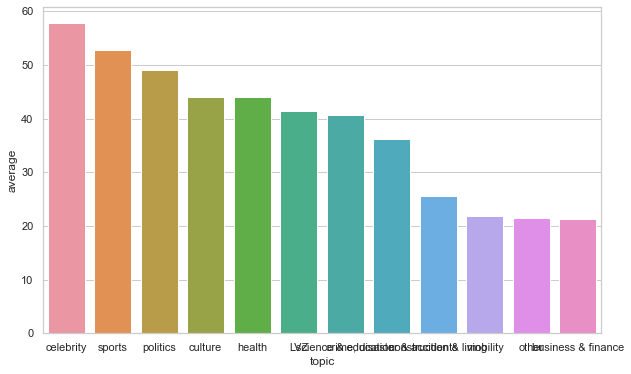

In [71]:
df = df_X
sns.set(rc={'figure.figsize':(10, 6)})
sns.set(style="whitegrid")

dct={}
count=0
for i in df["topic"].unique():
    count+=1
    x=df.loc[df["topic"]==i]
    p=x.loc[x["personal"]=="personalisation"]
    dct[count]={"topic":i, "average": round(len(p)/len(x)*100,2)}

df1=pd.DataFrame.from_dict(dct, orient='index', columns=["topic","average"])
sns.barplot(data=df1, x="topic", y="average", order=df1.sort_values('average', ascending = False).topic)

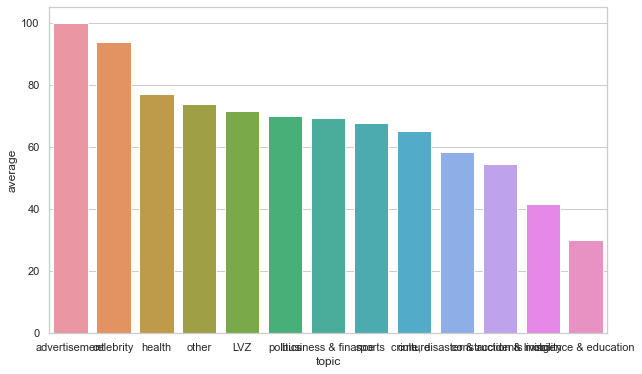

In [72]:
df = df_Insta 
sns.set(rc={'figure.figsize':(10, 6)})
sns.set(style="whitegrid")

dct={}
count=0
for i in df["topic"].unique():
    count+=1
    x=df.loc[df["topic"]==i]
    p=x.loc[x["personal"]=="personalisation"]
    dct[count]={"topic":i, "average": round(len(p)/len(x)*100,2)}

df1=pd.DataFrame.from_dict(dct, orient='index', columns=["topic","average"])
sns.barplot(data=df1, x="topic", y="average", order=df1.sort_values('average', ascending = False).topic)

In [73]:
df = df_X
df.dropna(subset=["regional"], inplace=True)

sns.set(rc={'figure.figsize':(15, 8)})
sns.set(style="whitegrid")
colors = ["#00acee"]
sns.set_palette(sns.color_palette(colors))

dct={}
count=0
for i in df["regional"].unique():
    count+=1
    x=df.loc[df["regional"]==i]
    p=x.loc[x["personal"]=="personalisation"]
    dct[count]={"regional":i, "average": round(len(p)/len(x)*100,2)}

df1=pd.DataFrame.from_dict(dct, orient='index', columns=["regional","average"])
print(df1)
#sns.barplot(data=df1, x="regional", y="average", order=df1.sort_values('average', ascending = False).regional)

          regional  average
1         regional    38.65
2  (inter)national    42.73


In [74]:
df = df_Insta
df.dropna(subset=["regional"], inplace=True)

sns.set(rc={'figure.figsize':(15, 8)})
sns.set(style="whitegrid")
colors = ["#00acee"]
sns.set_palette(sns.color_palette(colors))

dct={}
count=0
for i in df["regional"].unique():
    count+=1
    x=df.loc[df["regional"]==i]
    p=x.loc[x["personal"]=="personalisation"]
    dct[count]={"regional":i, "average": round(len(p)/len(x)*100,2)}

df1=pd.DataFrame.from_dict(dct, orient='index', columns=["regional","average"])
print(df1)
#sns.barplot(data=df1, x="regional", y="average", order=df1.sort_values('average', ascending = False).regional)

          regional  average
1         regional    62.96
2  (inter)national    73.42


## 11. Opinion <a class="anchor" id="fifth-bullet"></a>

In [75]:
df = df_X

unique_opinions = df["opinion"].unique()
likes_means= []
comments_means = []

for opinion in df["opinion"].unique():
    likes_mean = df.loc[df["opinion"] == opinion, "no_of_likes"].mean()
    comments_mean = df.loc[df["opinion"] == opinion, "no_of_comments"].mean()
    likes_means.append(likes_mean)
    comments_means.append(comments_mean)
    
for opinion, likes_mean, comments_mean in zip(unique_opinions, likes_means, comments_means):
    print(opinion, "Likes Mean:", round(likes_mean, 2), "Comments Mean:", round(comments_mean, 2),  "\t")

News Likes Mean: 3.71 Comments Mean: 1.24 	
Interview Likes Mean: 4.03 Comments Mean: 1.69 	
Comment Likes Mean: 3.61 Comments Mean: 1.17 	
Report/ Analysis Likes Mean: 6.38 Comments Mean: 4.25 	


In [76]:
x=df_X.loc[df_X["opinion"]=="Report/ Analysis"]
print(x["text"], x["no_of_likes"], x["no_of_comments"])
print(len(x))

411     Leipzigs Oberbürgermeister schlägt Alarm. Die ...
430     3:1, mehr als zwei auffällige Profis und alles...
451     Mit der offiziellen Gründung des Bündnisses Sa...
834     Timo Werner trifft, Kevin Kampl sieht neue Qua...
1183    Innerhalb von nur zehn Jahren wächst der Perso...
1196    Innerhalb von zehn Jahren wächst der Personalb...
1472    #RB #Leipzig verdiente sich beim 2:3 bei #Manc...
1495    #Antisemitismus-Vorwurf in #Leipzig: Gil #Ofar...
Name: text, dtype: object 411      4.0
430      2.0
451      2.0
834      2.0
1183     4.0
1196     1.0
1472     2.0
1495    34.0
Name: no_of_likes, dtype: float64 411     18.0
430      0.0
451      4.0
834      0.0
1183     2.0
1196     0.0
1472     0.0
1495    10.0
Name: no_of_comments, dtype: float64
8


In [77]:
df = df_Insta

unique_opinions = df["opinion"].unique()
likes_means= []
comments_means = []

for opinion in df["opinion"].unique():
    likes_mean = df.loc[df["opinion"] == opinion, "no_of_likes"].mean()
    comments_mean = df.loc[df["opinion"] == opinion, "no_of_comments"].mean()
    likes_means.append(likes_mean)
    comments_means.append(comments_mean)
    
for opinion, likes_mean, comments_mean in zip(unique_opinions, likes_means, comments_means):
    print(opinion, "Likes Mean:", round(likes_mean, 2), "Comments Mean:", round(comments_mean, 2),  "\t")

News Likes Mean: 916.25 Comments Mean: 55.08 	
Interview Likes Mean: 704.01 Comments Mean: 31.25 	
Comment Likes Mean: 662.86 Comments Mean: 17.93 	
Report/ Analysis Likes Mean: 335.33 Comments Mean: 44.0 	
Cooperation/ Ad Likes Mean: 131.44 Comments Mean: 1.25 	


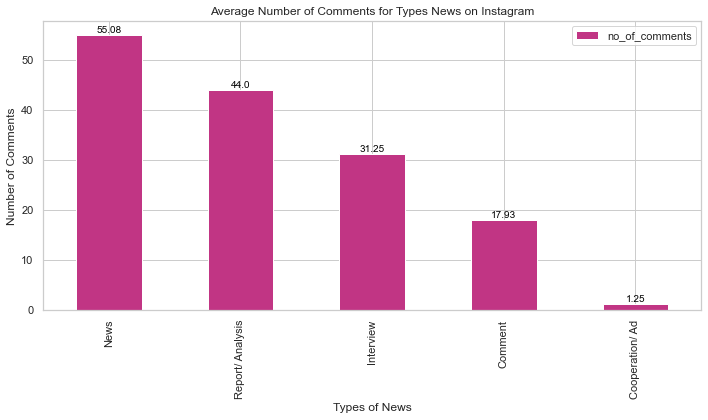

In [78]:
df = df_Insta

sns.set(rc={'figure.figsize':(10, 6)})
sns.set(style="whitegrid")


ax=df.groupby("opinion")["no_of_comments"].mean().sort_values(ascending = False).plot(kind="bar",legend=True, color=["#C13584"])

plt.title('Average Number of Comments for Types News on Instagram')
plt.xlabel('Types of News')
plt.ylabel('Number of Comments')
plt.tight_layout()

for p in ax.patches:
    ax.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2, p.get_height()+1),
                ha='center', va='center', fontsize=10, color='black')
    

plt.savefig('C:/Users/Lui/Desktop/Leuphana/01_Bachelor Arbeit/Data/Images/opinion_comments_insta.png')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

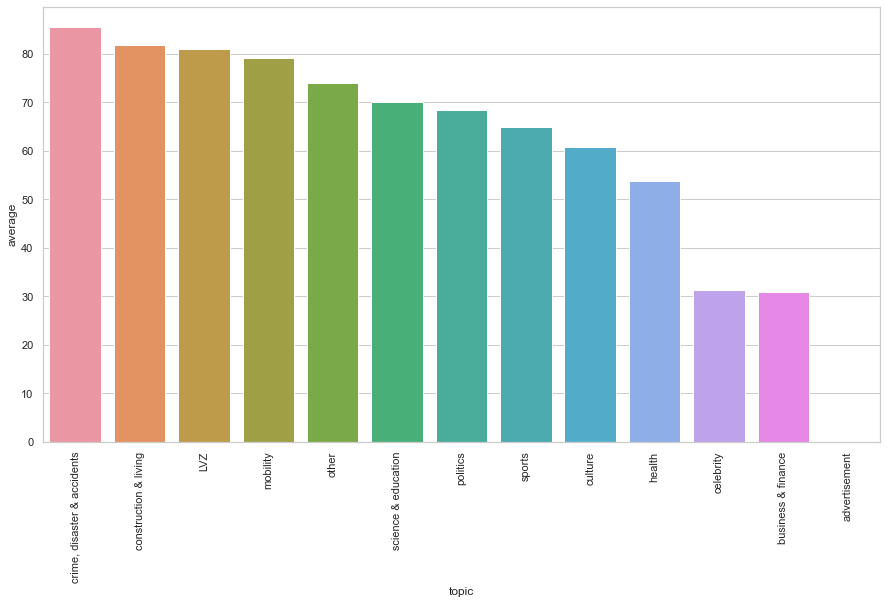

In [79]:
df = df_Insta 

sns.set(rc={'figure.figsize':(15, 8)})
sns.set(style="whitegrid")
colors = ["#00acee"]
sns.set_palette(sns.color_palette(colors))

dct={}
count=0
for i in df["topic"].unique():
    count+=1
    x=df.loc[df["topic"]==i]
    p=x.loc[x["opinion"]=="News"]
    dct[count]={"topic":i, "average": round(len(p)/len(x)*100,2)}

df1=pd.DataFrame.from_dict(dct, orient='index', columns=["topic","average"])
ax = sns.barplot(data=df1, x="topic", y="average", order=df1.sort_values('average', ascending = False).topic)   
plt.xticks(rotation=90)

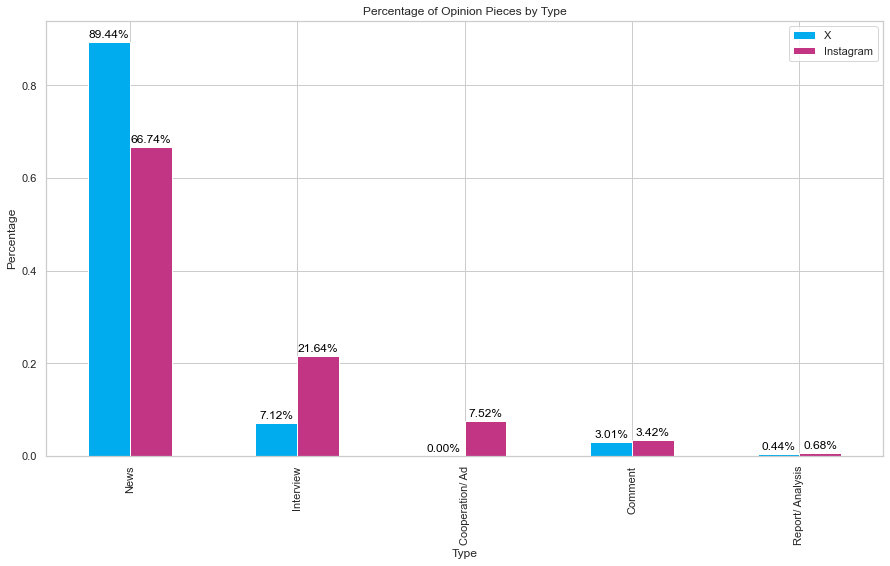

In [80]:
opinion_df=merged_df.copy()

total_counts = opinion_df['type'].value_counts()
percentage_df = pd.DataFrame()

for opinion in opinion_df['opinion'].unique():
    percentage_df[opinion] = opinion_df[opinion_df['opinion'] == opinion]['type'].value_counts() / total_counts

percentage_df = percentage_df.transpose()
percentage_df = percentage_df.sort_values(by='Instagram', ascending=False)

sns.set(rc={'figure.figsize':(15, 8)})
sns.set(style="whitegrid")
ax = percentage_df.plot(kind='bar', stacked=False, color=["#00acee", '#C13584'])
plt.title('Percentage of Opinion Pieces by Type')
plt.xlabel('Type')
plt.ylabel('Percentage')

for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.2f}%', ((p.get_x()+p.get_width()/2), p.get_y() + p.get_height() +  0.015),
                ha='center', va='center', fontsize=12, color='black')

#plt.savefig('C:/Users/Lui/Desktop/Leuphana/01_Bachelor Arbeit/Data/Images/02_percentage_of_opinion_pieces_by_type.png') 
plt.show()

## 12. Emotional <a class="anchor" id="sixth-bullet"></a>

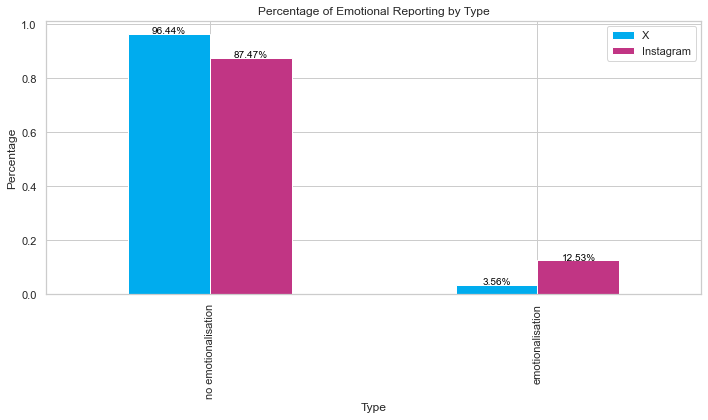

In [81]:
emotional_df=merged_df.copy()
emotional_df['emotional'] = emotional_df['emotional'].replace(["no ", "o"], "no")
emotional_df = emotional_df.dropna(subset=['emotional'])

total_counts = emotional_df['type'].value_counts()
percentage_df = pd.DataFrame()

for opinion in emotional_df['emotional'].unique():
    percentage_df[opinion] = emotional_df[emotional_df['emotional'] == opinion]['type'].value_counts() / total_counts
percentage_df = percentage_df.transpose()
percentage_df = percentage_df.sort_values(by='Instagram', ascending=False)

sns.set(rc={'figure.figsize':(10, 6)})
sns.set(style="whitegrid")
ax = percentage_df.plot(kind='bar', stacked=False, color=["#00acee", '#C13584'])
plt.title('Percentage of Emotional Reporting by Type')
plt.xlabel('Type')
plt.ylabel('Percentage')
plt.tight_layout()

for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height() + 0.01),
                ha='center', va='center', fontsize=10, color='black')

plt.savefig('C:/Users/Lui/Desktop/Leuphana/01_Bachelor Arbeit/Data/Images/06_percentage_of_emotional_reporting_by_type.png')
plt.show()

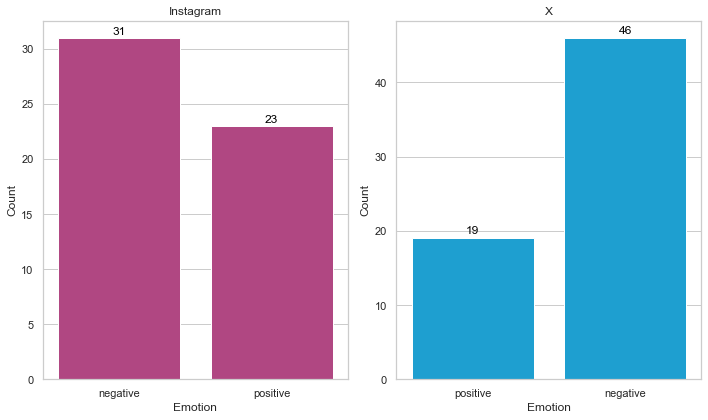

In [82]:
fig, (ax, ax1) = plt.subplots(1, 2)
sns.set(rc={'figure.figsize':(15, 8)})
sns.countplot(df_Insta["emotion"], label="Instagram", color='#C13584', ax=ax)
ax.set_title('Instagram')
ax.set_xlabel('Emotion')
ax.set_ylabel('Count')

sns.countplot(df_X["emotion"], label="X", color="#00acee", ax=ax1)
ax1.set_title('X')
ax1.set_xlabel('Emotion')
ax1.set_ylabel('Count')

for p in ax.patches:
    ax.annotate(p.get_height(), ((p.get_width()/2 +p.get_x()), p.get_y() + p.get_height() +0.6),
                ha='center', va='center', color='black')
for p in ax1.patches:
    ax1.annotate(p.get_height(), ((p.get_width()/2 +p.get_x()), p.get_y() + p.get_height() +1),
                ha='center', va='center', color='black')


plt.tight_layout()
plt.show()

In [83]:
len(df_Insta.loc[df_Insta["emotion"] == "negative"])/len(df_Insta.loc[df_Insta["emotional"]=="emotionalisation"])*100

57.407407407407405

In [84]:
len(df_X.loc[df_X["emotion"] == "negative"])/len(df_X.loc[df_X["emotional"]=="emotionalisation"])*100

70.76923076923077